In [215]:
# 1. Importamos los paquetes necesarios
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion
from scipy.stats import mannwhitneyu



In [216]:
# Función para mantener misma paleta de colores en las gráficas
BASE_COLORS = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#b3b3cc', '#f781bf']

def graficar_columna_categorica(df, columna, titulo=None):
    """
    Genera un gráfico de barras con colores diferenciados y sin leyenda,
    adaptando los colores al número de categorías de la columna.

    Parámetros:
        df: DataFrame de entrada
        columna: str, nombre de la columna categórica a graficar
        titulo: str, título del gráfico
    """
    # Contar valores de la columna
    conteo = df[columna].value_counts()
    categorias_colors = conteo.index.tolist()

    # Ajustar la paleta según número de categorías
    colores = BASE_COLORS[:len(categorias_colors)]

    # Crear gráfico
    plt.figure(figsize=(8, 4))
    plt.bar(categorias_colors, conteo.values, color=colores)
    
    # Estética
    plt.title(titulo or f'{columna} distribution')
    plt.xlabel(columna.replace('_', ' ').title())
    plt.ylabel('Players')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [217]:
# 2. Importamos el archivo xlsx y lo convertimos en DataFrame
df = pd.read_excel('Gaming_Survey.xlsx')

In [218]:
# 3. Dimensiones del dataset
print(f"Filas y columnas: {df.shape}")

Filas y columnas: (500, 22)


In [219]:
# 4. Primeras filas del dataset
print("\nPrimeras filas:")
display(df.head())


Primeras filas:


,Timestamp,Age,Gender,Location,How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),...,Why do you play video games? (Check all that apply),How often do you play video games?,How many hours do you typically spend gaming in a week?,Which device do you play games on the most?(Check all that apply),What genres of video games do you play? (Check all that apply),What is your favorite game?,How do you discover new games? (Check all that apply),Do you prefer single-player or multiplayer games?,"How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?",Why do you play video games? (Check all that apply)
0,2024-10-24 13:09:27.109,18,Male,Bangalore,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",...,"For fun/entertainment, To relieve stress",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-24 13:09:34.343,19,Male,"Hell road , Bangalore",Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,...,To improve skills/competition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-24 13:23:13.403,19,Male,Bangalore,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-24 13:30:42.445,18,Female,Banglore,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-24 13:32:26.815,18,Female,"Banglore, Karnataka",Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,"For fun/entertainment, To relieve stress, To s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
# 5. Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
Timestamp                                                                                     datetime64[ns]
Age                                                                                                    int64
Gender                                                                                                object
Location                                                                                              object
  How often do you play video games?                                                                  object
  How many hours do you typically spend gaming in a week?                                             object
  Which device do you play games on the most?(Check all that apply)                                   object
What genres of video games do you play? (Check all that apply)                                        object
  What is your favorite game?                                                                         object
Ho

In [221]:
# 6. Información general del dataset
print("\nInformación general:")
print(df.info())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                                                                      Non-Null Count  Dtype         
---  ------                                                                                      --------------  -----         
 0   Timestamp                                                                                   500 non-null    datetime64[ns]
 1   Age                                                                                         500 non-null    int64         
 2   Gender                                                                                      500 non-null    object        
 3   Location                                                                                    500 non-null    object        
 4     How often do you play video games?                                                        500 non-

In [222]:
# 7. Porcentaje de valores nulos por columna
print("\nPorcentaje de valores nulos por columna:")
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage.sort_values(ascending=False))


Porcentaje de valores nulos por columna:
Why do you play video games? (Check all that apply)                                           40.0
How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?       40.0
Do you prefer single-player or multiplayer games?                                             40.0
How do you discover new games? (Check all that apply)                                         40.0
What is your favorite game?                                                                   40.0
What genres of video games do you play? (Check all that apply)                                40.0
Which device do you play games on the most?(Check all that apply)                             40.0
How many hours do you typically spend gaming in a week?                                       40.0
How often do you play video games?                                                            40.0
Age                                                                

In [223]:
# 8. Eliminamos espacios antes y después de cada nombre de las columnas para poder procesarlos
df.columns = df.columns.str.strip()
print(df.columns)

Index(['Timestamp', 'Age', 'Gender', 'Location',
       'How often do you play video games?',
       'How many hours do you typically spend gaming in a week?',
       'Which device do you play games on the most?(Check all that apply)',
       'What genres of video games do you play? (Check all that apply)',
       'What is your favorite game?',
       'How do you discover new games? (Check all that apply)',
       'Do you prefer single-player or multiplayer games?',
       'How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?',
       'Why do you play video games? (Check all that apply)',
       'How often do you play video games?',
       'How many hours do you typically spend gaming in a week?',
       'Which device do you play games on the most?(Check all that apply)',
       'What genres of video games do you play? (Check all that apply)',
       'What is your favorite game?',
       'How do you discover new games? (Check all that apply)',
       

In [224]:
# 9. Vemos que hay columnas repetidas. Esto puede ser debido a que, al haber sido rellenado con un formulario, cada jugador eligió uno o dos juegos para la encuesta.
# Renombramos las columnas repetidas, para que sea mas eficiente a la hora de analizar los datos.
nombres_cortos = {
    'Timestamp': 'timestamp',
    'Age': 'age',
    'Gender': 'gender',
    'Location': 'location',
    'How often do you play video games?': 'frequency',
    'How many hours do you typically spend gaming in a week?': 'hours_per_week',
    'Which device do you play games on the most?(Check all that apply)': 'device',
    'What genres of video games do you play? (Check all that apply)': 'genres',
    'What is your favorite game?': 'favorite_game',
    'How do you discover new games? (Check all that apply)': 'discovery',
    'Why do you play video games? (Check all that apply)': 'motivation',
    'Do you prefer single-player or multiplayer games?': 'game_mode',
    'How much do you spend on gaming monthly (including in-game purchases, new games, etc.)?': 'monthly_spend'
}

df.rename(columns=nombres_cortos, inplace=True)

df.head()

,timestamp,age,gender,location,frequency,hours_per_week,device,genres,favorite_game,discovery,...,motivation,frequency,hours_per_week,device,genres,favorite_game,discovery,game_mode,monthly_spend,motivation
0,2024-10-24 13:09:27.109,18,Male,Bangalore,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",...,"For fun/entertainment, To relieve stress",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-10-24 13:09:34.343,19,Male,"Hell road , Bangalore",Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,...,To improve skills/competition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-10-24 13:23:13.403,19,Male,Bangalore,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-10-24 13:30:42.445,18,Female,Banglore,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-10-24 13:32:26.815,18,Female,"Banglore, Karnataka",Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,...,"For fun/entertainment, To relieve stress, To s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
# 10. Hacemos copia del df original para manipular los datos y poder volver atrás si nos equivocamos
df_copia = df.copy()

In [226]:
# 11. Función para recombrar columnas repetidas con sufijos
def renombrar_repetidas_con_sufijos(df, mantener_sin_sufijo=None):
    if mantener_sin_sufijo is None:
        mantener_sin_sufijo = []

    nombre_counts = {}
    nuevos_nombres = []

    for col in df.columns:
        if col in mantener_sin_sufijo:
            nuevos_nombres.append(col)
        else:
            if col not in nombre_counts:
                nombre_counts[col] = 1
                nuevos_nombres.append(f"{col}_1")
            else:
                nombre_counts[col] += 1
                nuevos_nombres.append(f"{col}_{nombre_counts[col]}")

    df.columns = nuevos_nombres
    return df

In [227]:
# 11. Sobre la copia del df original, renombramos las columnas duplicadas para diferenciar entre "Juego 1" y "Juego 2"
# Columnas que NO queremos que lleven número
fijas = ['timestamp', 'age', 'gender', 'location']

# Aplicar renombrado
df_copia = renombrar_repetidas_con_sufijos(df_copia, mantener_sin_sufijo=fijas)

print(df_copia.columns.tolist())


['timestamp', 'age', 'gender', 'location', 'frequency_1', 'hours_per_week_1', 'device_1', 'genres_1', 'favorite_game_1', 'discovery_1', 'game_mode_1', 'monthly_spend_1', 'motivation_1', 'frequency_2', 'hours_per_week_2', 'device_2', 'genres_2', 'favorite_game_2', 'discovery_2', 'game_mode_2', 'monthly_spend_2', 'motivation_2']


In [228]:
# 12. La columna timestamp es irrelevante para nuestro análisis, ya que no es importante en qué fecha se rellenó cada encuesta, así que la eliminamos
df_copia.drop(columns=['timestamp'], inplace=True)

# Resetear índice y eliminar el anterior
df_copia.reset_index(drop=True, inplace=True)

# Confirmar
df_copia.head()

,age,gender,location,frequency_1,hours_per_week_1,device_1,genres_1,favorite_game_1,discovery_1,game_mode_1,...,motivation_1,frequency_2,hours_per_week_2,device_2,genres_2,favorite_game_2,discovery_2,game_mode_2,monthly_spend_2,motivation_2
0,18,Male,Bangalore,Daily,10-20 hours,Mobile,Sports,FC MOBILE,"Social Media, Gaming Forums",Both,...,"For fun/entertainment, To relieve stress",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,Male,"Hell road , Bangalore",Rarely/Never,0,Mobile,"Puzzle/Strategy, Simulation (e.g., The Sims)",Wukong,Social Media,Single-player,...,To improve skills/competition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,Male,Bangalore,Rarely/Never,More than 20 hours,"Console (PlayStation, Xbox, etc.)",First-Person Shooter (FPS),Call of duty,Gaming Forums,Multiplayer,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,Female,Banglore,Rarely/Never,Less than 5 hours,Mobile,Puzzle/Strategy,Subway,Social Media,Both,...,For fun/entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,Female,"Banglore, Karnataka",Daily,Less than 5 hours,"PC, Mobile","Action/Adventure, First-Person Shooter (FPS), ...",Solo leveling arise,Friends/Family Recommendations,Multiplayer,...,"For fun/entertainment, To relieve stress, To s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
# 13. Vamos a limpiar los datos de "gender" para que todos tengan el mismo formato
df_copia['gender'].unique()

array(['Male', 'Female', 'male'], dtype=object)

In [230]:
# El valor 'male' está en minúscula, así que vamos a unificarlo
df_copia['gender'] = df_copia['gender'].str.strip().str.lower().str.capitalize()
df_copia['gender'].value_counts()

gender
Female    268
Male      232
Name: count, dtype: int64

In [231]:
# 14. Ahora vamos a limpiar los datos de "location" para que todos tengan el mismo formato
df_copia['location'].unique()

array(['Bangalore', 'Hell road , Bangalore ', 'Banglore',
       'Banglore, Karnataka ', 'Bangalore ', 'Jain University ',
       'bangalore', 'Harohalli',
       'Nayapalli n4/8 near balaram medecine store bhubaneswar,odisha,India',
       'Odisha,Bhubaneswar ', 'Karnataka ', 'Andhra Pradesh', 'banglore',
       'Bhubaneswar, odisha ', 'Banglore ', 'karnataka', 'Karnataka',
       'Hell road , Bangalore', 'Banglore, Karnataka', 'Jain University',
       'bhubaneswar,odisha,India', 'Odisha,Bhubaneswar',
       'Bhubaneswar, odisha', 'Chennai', 'Kolkata', 'Pune', 'Hyderabad',
       'Mumbai', 'Ahmedabad', 'Delhi', 'Florida', 'London', 'Ohio',
       'Texas', 'New York', 'Toronto', 'California'], dtype=object)

In [232]:
correcciones_location = {
    'Banglore': 'Bangalore',
    'Banglore ': 'Bangalore',
    'banglore': 'Bangalore',
    'Banglore, Karnataka': 'Bangalore',
    'Banglore, Karnataka ': 'Bangalore',
    'Bangalore ': 'Bangalore',
    'bangalore': 'Bangalore',
    'Hell road , Bangalore': 'Bangalore',
    'Hell road , Bangalore ': 'Bangalore',

    'Karnataka ': 'Karnataka',
    'karnataka': 'Karnataka',

    'Bhubaneswar, odisha': 'Bhubaneswar',
    'bhubaneswar,odisha,India': 'Bhubaneswar',
    'Bhubaneswar, odisha ': 'Bhubaneswar',
    'Odisha,Bhubaneswar': 'Bhubaneswar',
    'Odisha,Bhubaneswar ': 'Bhubaneswar',
    'Nayapalli n4/8 near balaram medecine store bhubaneswar,odisha,India': 'Bhubaneswar',

    'Jain University ': 'Jain University',

    'Harohalli': 'Harohalli',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Chennai': 'Chennai',
    'Kolkata': 'Kolkata',
    'Pune': 'Pune',
    'Hyderabad': 'Hyderabad',
    'Mumbai': 'Mumbai',
    'Ahmedabad': 'Ahmedabad',
    'Delhi': 'Delhi',
    'Florida': 'Florida',
    'London': 'London',
    'Ohio': 'Ohio',
    'Texas': 'Texas',
    'New York': 'New York',
    'Toronto': 'Toronto',
    'California': 'California'
}

df_copia['location'] = df_copia['location'].str.strip()  # eliminar espacios
df_copia['location'] = df_copia['location'].replace(correcciones_location)

In [233]:
print(df_copia['location'].value_counts())

location
Bangalore          89
Mumbai             50
Delhi              48
New York           36
London             32
Ohio               32
Florida            30
Toronto            25
Texas              25
Pune               20
Hyderabad          20
Kolkata            19
Chennai            18
California         17
Ahmedabad          13
Bhubaneswar         9
Karnataka           8
Jain University     3
Andhra Pradesh      3
Harohalli           3
Name: count, dtype: int64


In [234]:
# 15. Vamos a limpiar los datos de "frequency_1" y "frequency_2" para que todos tengan el mismo formato
df_copia['frequency_1'].unique()

array(['Daily', 'Rarely/Never', 'A few times in a week',
       'A few times in a month', 'A few times a week'], dtype=object)

In [235]:
# Vemos que 'A few times in a week' y 'A few times a week' deberían ser lo mismo, pero están escritos de forma distinta.
correcciones_frequency = {
    'A few times in a week': 'A few times a week'
}

# Limpiar espacios y aplicar corrección
df_copia['frequency_1'] = df_copia['frequency_1'].str.strip()
df_copia['frequency_1'] = df_copia['frequency_1'].replace(correcciones_frequency)

df_copia['frequency_1'].value_counts()

frequency_1
Daily                     209
A few times a week        150
Rarely/Never              121
A few times in a month     20
Name: count, dtype: int64

In [236]:
# Hacemos lo mismo con 'frequency_2' y vemos que, en este caso, los valores son diferentes
df_copia['frequency_2'].value_counts()


frequency_2
Daily           107
Rarely/Never     98
Weekly           95
Name: count, dtype: int64

In [237]:
# Unificamos los valores para que sean consistentes
correcciones_frequency = {
    'A few times a week': 'Weekly',
    'A few times in a month': 'Monthly'
}

df_copia['frequency_1'] = df_copia['frequency_1'].replace(correcciones_frequency)
df_copia['frequency_1'].value_counts()

frequency_1
Daily           209
Weekly          150
Rarely/Never    121
Monthly          20
Name: count, dtype: int64

In [238]:
# 16. Hacemos lo mismo con los datos de "hours_per_week_1" y "hours_per_week_2" para que todos tengan el mismo formato
print(df_copia['hours_per_week_1'].unique())
print(df_copia['hours_per_week_2'].unique())

['10-20 hours' 0 'More than 20 hours' 'Less than 5 hours' '30mins'
 '5-10 hours']
[nan '5-10 hours' 'Less than 5 hours' '10-20 hours' 'More than 20 hours']


In [239]:
correcciones_horas = {
    '30mins': 'Less than 1 hour',
    '0': '0 hours',
    '0.0': '0 hours',
    'None': '0 hours',
    'Less than 5 hours': '1–5 hours',
    '5-10 hours': '5–10 hours',
    '10-20 hours': '10–20 hours'
    # 'More than 20 hours' ya está bien
}

# Limpiar y reemplazar en hours_per_week_1
df_copia['hours_per_week_1'] = df_copia['hours_per_week_1'].astype(str).str.strip()
df_copia['hours_per_week_1'] = df_copia['hours_per_week_1'].replace(correcciones_horas)

# Limpiar y reemplazar en hours_per_week_2
df_copia['hours_per_week_2'] = df_copia['hours_per_week_2'].astype(str).str.strip()
df_copia['hours_per_week_2'] = df_copia['hours_per_week_2'].replace(correcciones_horas)

print(df_copia['hours_per_week_1'].value_counts())
print(df_copia['hours_per_week_2'].value_counts())

hours_per_week_1
5–10 hours            161
10–20 hours           135
1–5 hours             112
More than 20 hours     80
0 hours                 6
Less than 1 hour        6
Name: count, dtype: int64
hours_per_week_2
nan                   200
1–5 hours              80
More than 20 hours     78
10–20 hours            72
5–10 hours             70
Name: count, dtype: int64


In [240]:
# 17. Vamos ahora con los datos de "device_1" y "device_2"
print(df_copia['device_1'].unique())
print(df_copia['device_2'].unique())

['Mobile' 'Console (PlayStation, Xbox, etc.)' 'PC, Mobile'
 'Console (PlayStation, Xbox, etc.), Mobile'
 'Console (PlayStation, Xbox, etc.), Handheld devices (Nintendo Switch, etc.)'
 'PC' 'PC, Console (PlayStation, Xbox, etc.), Mobile' 'Console, Mobile'
 'Tablet' 'PC, Console']
[nan 'PC, Console' 'PC, Mobile' 'All' 'Console (PlayStation, Xbox, etc.)'
 'Mobile, Console' 'Mobile' 'PC']


In [241]:
# Creo una copia de seguridad por si acaso
df_copia_3 = df_copia.copy()

In [242]:
# Creamos una función para unificar los valores y limpiarlos
def limpiar_dispositivos_orden_personalizado(col):
    orden = ['PC', 'Console', 'Mobile']
    mapa_final = {'pc': 'PC', 'console': 'Console', 'mobile': 'Mobile'}

    def procesar(x):
        if pd.isna(x):
            return None
        x = str(x).lower()
        x = x.replace('console (playstation, xbox, etc.)', 'console')
        x = x.replace('handheld devices (nintendo switch, etc.)', 'console')
        x = x.replace('tablet', 'mobile')
        x = x.replace('all', 'pc, mobile, console')
        dispositivos_raw = [d.strip() for d in x.replace(', ', ',').replace(' ,', ',').split(',')]
        dispositivos = [mapa_final.get(d, d.capitalize()) for d in dispositivos_raw]
        dispositivos = list(set(dispositivos))  # eliminar duplicados
        dispositivos_ordenados = [d for d in orden if d in dispositivos]
        return ', '.join(dispositivos_ordenados)

    return col.apply(procesar)


In [243]:
df_copia_3['device_1'] = limpiar_dispositivos_orden_personalizado(df_copia_3['device_1'])
df_copia_3['device_2'] = limpiar_dispositivos_orden_personalizado(df_copia_3['device_2'])

print(df_copia_3['device_1'].value_counts())
print(df_copia_3['device_2'].value_counts())


device_1
Mobile                 176
PC, Mobile              89
Console                 65
Console, Mobile         65
PC                      51
PC, Console             44
PC, Console, Mobile     10
Name: count, dtype: int64
device_2
Console                47
PC, Mobile             46
PC, Console, Mobile    45
Mobile                 45
PC, Console            43
Console, Mobile        41
PC                     33
Name: count, dtype: int64


In [244]:
# 18. Ahora vamos con "genres"
print(df_copia_3['genres_1'].value_counts())


genres_1
Sports                                                                                                                                                      46
First-Person Shooter (FPS)                                                                                                                                  45
Action/Adventure, Role-Playing Games (RPG)                                                                                                                  42
Action/Adventure, First-Person Shooter (FPS)                                                                                                                40
Puzzle/Strategy                                                                                                                                             23
Action/Adventure, First-Person Shooter (FPS), Role-Playing Games (RPG)                                                                                      23
Action/Adventure, First-Person Shoote

In [245]:
print(df_copia_3['genres_2'].value_counts())

genres_2
Simulation                    42
Action/Adventure              42
Puzzle/Strategy               41
First-Person Shooter (FPS)    40
Role-playing                  36
Horror                        35
Sports                        34
Casual                        30
Name: count, dtype: int64


In [246]:
# Vemos que hay muchos géneros diferentes asi que vamos a agruparlos y limpiarlos
mapa_generos = {
    'first-person shooter (fps)': 'First-Person Shooter',
    'fps': 'First-Person Shooter',
    'action/adventure': 'Action-Adventure',
    'action adventure': 'Action-Adventure',
    'puzzle/strategy': 'Puzzle-Strategy',
    'simulation (e.g., the sims)': 'Simulation',
    'simulation': 'Simulation',
    'sports': 'Sports',
    'mmo (massively multiplayer online)': 'MMO',
    'role-playing games (rpg)': 'Role-Playing',
    'role-playing': 'Role-Playing',
    'rpg': 'Role-Playing',
    'casual': 'Casual',
    'horror': 'Horror',
    # en caso de que alguien haya escrito todo junto
    'action/adventure, sports': 'Action-Adventure, Sports'
}

In [247]:
# Creamos copia de seguridad por si acaso
df_copia_5 = df_copia_3.copy()

In [248]:
# Función de limpieza
def limpiar_generos(col):
    def procesar(x):
        if pd.isna(x):
            return None
        x = str(x).lower()
        generos_raw = [g.strip() for g in x.replace(', ', ',').replace(' ,', ',').split(',')]
        generos_norm = [mapa_generos.get(g, g.title()) for g in generos_raw]
        generos_unicos = sorted(set(generos_norm))
        return ', '.join(generos_unicos)
    
    return col.apply(procesar)

df_copia_5['genres_1'] = limpiar_generos(df_copia_5['genres_1'])
df_copia_5['genres_2'] = limpiar_generos(df_copia_5['genres_2'])


print(df_copia_5['genres_1'].value_counts())
print(df_copia_5['genres_2'].value_counts())


genres_1
Sports                                                                                                     46
First-Person Shooter                                                                                       45
Action-Adventure, Role-Playing                                                                             42
Action-Adventure, First-Person Shooter                                                                     40
Puzzle-Strategy                                                                                            23
Action-Adventure, First-Person Shooter, Role-Playing                                                       23
Action-Adventure, First-Person Shooter, MMO, Role-Playing                                                  23
First-Person Shooter, Role-Playing, Simulation (E.G., The Sims)                                            23
Puzzle-Strategy, Simulation (E.G., The Sims)                                                               23
M

In [249]:
# 19. Vamos a limpiar ahora las columnas "favorite_game_1" y "favorite_game_2"
print(df_copia_5['favorite_game_1'].value_counts(dropna=False))
print(df_copia_5['favorite_game_2'].value_counts(dropna=False))

favorite_game_1
FC MOBILE                    23
Call of duty                 23
Subway                       23
Solo leveling arise          23
Efootball                    23
Call of duty                 23
call of duty                 23
Wukong                       23
Rhythm Rush lite             22
Wuthering waves              22
CALL OF DUTY                 22
Solo Levelling               22
Wuther waves                 22
Free fire,wuthering waves    22
Moba Legends                 22
BGMI                         22
Red dead redemption 2        20
Chess and clash of clans     20
God of war ragnarok          20
fornite                      20
bgmi,coc,chess               20
efootball                    20
Many                         20
Name: count, dtype: int64
favorite_game_2
NaN                  200
FIFA 2024             42
Call of Duty          39
Overwatch             35
League of Legends     31
Minecraft             29
Genshin Impact        27
Apex Legends          27
Fortni

In [250]:
mapa_juegos = {
    'Call Of Duty': 'Call Of Duty',
    'CALL OF DUTY': 'Call Of Duty',
    'call of duty': 'Call Of Duty',

    'Fornite': 'Fortnite',
    'Fortnite': 'Fortnite',

    'efootball': 'Efootball',
    'Efootball': 'Efootball',

    'FC MOBILE': 'FC Mobile',
    'Fc Mobile': 'FC Mobile',

    'Solo leveling arise': 'Solo Leveling',
    'Solo Levelling': 'Solo Leveling',

    'Wuthering waves': 'Wuthering Waves',
    'Wuther Waves': 'Wuthering Waves',

    'Rhythm Rush lite': 'Rhythm Rush Lite',
    'Wukong': 'Wukong',
    'Subway': 'Subway',
    'Many': 'Many',
    'BGMI': 'BGMI',
    'bgmi,coc,chess': 'BGMI, COC, Chess',
    'Moba Legends': 'MOBA Legends',
    'Red dead redemption 2': 'Red Dead Redemption 2',
    'God of war ragnarok': 'God Of War Ragnarok',
    'Chess and clash of clans': 'Chess And Clash Of Clans',
    'Free fire,wuthering waves': 'Free Fire, Wuthering Waves',

    # Juegos del favorite_game_2
    'FIFA 2024': 'FIFA',
    'Call of Duty': 'Call Of Duty',
    'Overwatch': 'Overwatch',
    'League of Legends': 'League Of Legends',
    'Minecraft': 'Minecraft',
    'Genshin Impact': 'Genshin Impact',
    'Apex Legends': 'Apex Legends',
    'Among Us': 'Among Us',
    'Valorant': 'Valorant'
}


In [251]:
# Hacemos copia de seguridad por si acaso
df_copia_6 = df_copia_5.copy()

In [252]:
# Función de limpieza
def limpiar_favorite_game(col):
    return col.str.strip().str.title().replace(mapa_juegos)

In [253]:
df_copia_6['favorite_game_1'] = limpiar_favorite_game(df_copia_6['favorite_game_1'])
df_copia_6['favorite_game_2'] = limpiar_favorite_game(df_copia_6['favorite_game_2'])

print(df_copia_6['favorite_game_1'].value_counts())
print(df_copia_6['favorite_game_2'].value_counts())

favorite_game_1
Call Of Duty                 91
Wuthering Waves              44
Efootball                    43
Wukong                       23
FC Mobile                    23
Solo Leveling Arise          23
Subway                       23
Bgmi                         22
MOBA Legends                 22
Free Fire,Wuthering Waves    22
Rhythm Rush Lite             22
Solo Leveling                22
Red Dead Redemption 2        20
Chess And Clash Of Clans     20
God Of War Ragnarok          20
Fortnite                     20
Bgmi,Coc,Chess               20
Many                         20
Name: count, dtype: int64
favorite_game_2
Fifa 2024            42
Call Of Duty         39
Overwatch            35
League Of Legends    31
Minecraft            29
Genshin Impact       27
Apex Legends         27
Fortnite             26
Among Us             22
Valorant             22
Name: count, dtype: int64


In [254]:
# 20. Vamos a limpiar ahora las columnas "discovery_1" y "discovery_2"
print(df_copia_6['discovery_1'].unique())

['Social Media, Gaming Forums' 'Social Media' 'Gaming Forums'
 'Friends/Family Recommendations'
 'Social Media, Gaming Forums, Game Reviews/Blogs, YouTube/Streaming platforms (Twitch, etc.)'
 'Gaming Forums, YouTube/Streaming platforms (Twitch, etc.)'
 'Social Media, Friends/Family Recommendations'
 'Gaming Forums, Game Reviews/Blogs'
 'Social Media, Gaming Forums, Friends/Family Recommendations, Game Reviews/Blogs, YouTube/Streaming platforms (Twitch, etc.)'
 'I search myself from playstore '
 'Friends/Family Recommendations, YouTube/Streaming platforms (Twitch, etc.)'
 'YouTube/Streaming platforms (Twitch, etc.)'
 'Social Media, Gaming Forums, Game Reviews/Blogs, YouTube/Streaming platforms (Twitch, etc.), my own ways!!!']


In [255]:
print(df_copia_6['discovery_2'].unique())

[nan 'Friends/Family Recommendations' 'Gaming Forums' 'Social Media'
 'YouTube' 'Twitch']


In [256]:
# Hacemos copia de seguridad por si acaso
df_copia_8 = df_copia_6.copy()

In [257]:
# Creamos un nuevo df con la info de discovery 1 y discovery 2 para luego poder analizar esos datos y trabajar mejor sobre ellos
# 1. Obtener todas las categorías únicas de discovery_1 y discovery_2
# Las combinamos para evitar duplicados entre columnas
respuestas_1 = df_copia_8['discovery_1'].dropna().str.split(',').explode().str.strip()
respuestas_2 = df_copia_8['discovery_2'].dropna().str.split(',').explode().str.strip()

categorias_discovery = sorted(set(respuestas_1).union(set(respuestas_2)))
categorias_discovery

['Friends/Family Recommendations',
 'Game Reviews/Blogs',
 'Gaming Forums',
 'I search myself from playstore',
 'Social Media',
 'Twitch',
 'YouTube',
 'YouTube/Streaming platforms (Twitch',
 'etc.)',
 'my own ways!!!']

In [258]:
# 2. Crear columnas binarias para discovery_1 y discovery_2
df_discovery = pd.DataFrame(index=df_copia_8.index)

for cat in categorias_discovery:
    df_discovery[f'discovery1_{cat}'] = df_copia_8['discovery_1'].fillna('').apply(lambda x: int(cat in x))
    df_discovery[f'discovery2_{cat}'] = df_copia_8['discovery_2'].fillna('').apply(lambda x: int(cat in x))

# Eliminamos las columnas y las filas que solo tienen ceros
df_discovery = df_discovery.loc[:, (df_discovery != 0).any(axis=0)]
df_discovery = df_discovery.loc[df_discovery.sum(axis=1) > 0]
df_discovery.head()

,discovery1_Friends/Family Recommendations,discovery2_Friends/Family Recommendations,discovery1_Game Reviews/Blogs,discovery1_Gaming Forums,discovery2_Gaming Forums,discovery1_I search myself from playstore,discovery1_Social Media,discovery2_Social Media,discovery1_Twitch,discovery2_Twitch,discovery1_YouTube,discovery2_YouTube,discovery1_YouTube/Streaming platforms (Twitch,discovery1_etc.),discovery1_my own ways!!!
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [259]:
df_discovery.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   discovery1_Friends/Family Recommendations       500 non-null    int64
 1   discovery2_Friends/Family Recommendations       500 non-null    int64
 2   discovery1_Game Reviews/Blogs                   500 non-null    int64
 3   discovery1_Gaming Forums                        500 non-null    int64
 4   discovery2_Gaming Forums                        500 non-null    int64
 5   discovery1_I search myself from playstore       500 non-null    int64
 6   discovery1_Social Media                         500 non-null    int64
 7   discovery2_Social Media                         500 non-null    int64
 8   discovery1_Twitch                               500 non-null    int64
 9   discovery2_Twitch                               500 non-null    int64


In [260]:
df_discovery['discovery1_Recommendations'] = df_discovery.get('discovery1_Friends/Family Recommendations', 0)
df_discovery['discovery2_Recommendations'] = df_discovery.get('discovery2_Friends/Family Recommendations', 0)

df_discovery['discovery1_ReviewsBlogs'] = df_discovery.get('discovery1_Game Reviews/Blogs', 0)
df_discovery['discovery2_ReviewsBlogs'] = df_discovery.get('discovery2_Game Reviews/Blogs', 0)

df_discovery['discovery1_Other'] = (
    df_discovery.get('discovery1_I search myself from playstore', 0) |
    df_discovery.get('discovery1_my own ways!!!', 0)
)

cols_to_drop = [
    'discovery1_Friends/Family Recommendations', 'discovery2_Friends/Family Recommendations',
    'discovery1_Game Reviews/Blogs', 'discovery2_Game Reviews/Blogs',
    'discovery1_I search myself from playstore', 'discovery1_my own ways!!!'
]

df_discovery['discovery1_YouTube'] = (
    df_discovery.get('discovery1_YouTube', 0) |
    df_discovery.get('discovery1_YouTube/Streaming platforms (Twitch', 0) |
    df_discovery.get('discovery1_etc.)', 0)
)

df_discovery.drop(columns=[
    'discovery1_YouTube/Streaming platforms (Twitch',
    'discovery1_etc.)'
], inplace=True, errors='ignore')

df_discovery.drop(columns=cols_to_drop, inplace=True, errors='ignore')
df_discovery.info()


<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   discovery1_Gaming Forums    500 non-null    int64
 1   discovery2_Gaming Forums    500 non-null    int64
 2   discovery1_Social Media     500 non-null    int64
 3   discovery2_Social Media     500 non-null    int64
 4   discovery1_Twitch           500 non-null    int64
 5   discovery2_Twitch           500 non-null    int64
 6   discovery1_YouTube          500 non-null    int64
 7   discovery2_YouTube          500 non-null    int64
 8   discovery1_Recommendations  500 non-null    int64
 9   discovery2_Recommendations  500 non-null    int64
 10  discovery1_ReviewsBlogs     500 non-null    int64
 11  discovery2_ReviewsBlogs     500 non-null    int64
 12  discovery1_Other            500 non-null    int64
dtypes: int64(13)
memory usage: 54.7 KB


In [261]:
df_discovery.head()


,discovery1_Gaming Forums,discovery2_Gaming Forums,discovery1_Social Media,discovery2_Social Media,discovery1_Twitch,discovery2_Twitch,discovery1_YouTube,discovery2_YouTube,discovery1_Recommendations,discovery2_Recommendations,discovery1_ReviewsBlogs,discovery2_ReviewsBlogs,discovery1_Other
0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [262]:
# Creamos un df también para géneros, ya que nos vendrá bien para el análisis
# 1. Obtener géneros únicos
respuestas_g1 = df_copia_8['genres_1'].dropna().str.split(',').explode().str.strip()
respuestas_g2 = df_copia_8['genres_2'].dropna().str.split(',').explode().str.strip()

categorias_generos = sorted(set(respuestas_g1).union(set(respuestas_g2)))

# 2. Crear columnas binarias
df_genres = pd.DataFrame(index=df_copia_8.index)

for cat in categorias_generos:
    df_genres[f'genre1_{cat}'] = df_copia_8['genres_1'].fillna('').apply(lambda x: int(cat in x))
    df_genres[f'genre2_{cat}'] = df_copia_8['genres_2'].fillna('').apply(lambda x: int(cat in x))

# 3. Eliminar columnas sin datos (solo ceros)
df_genres = df_genres.loc[:, (df_genres != 0).any(axis=0)]

# 4. Eliminar filas vacías
df_genres = df_genres.loc[df_genres.sum(axis=1) > 0]

df_genres.head()

,genre1_Action-Adventure,genre2_Action-Adventure,genre2_Casual,genre1_First-Person Shooter,genre2_First-Person Shooter,genre2_Horror,genre1_MMO,genre1_Puzzle-Strategy,genre2_Puzzle-Strategy,genre1_Role-Playing,genre2_Role-Playing,genre1_Simulation,genre2_Simulation,genre1_Simulation (E.G.,genre1_Sports,genre2_Sports,genre1_The Sims)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [263]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   genre1_Action-Adventure      500 non-null    int64
 1   genre2_Action-Adventure      500 non-null    int64
 2   genre2_Casual                500 non-null    int64
 3   genre1_First-Person Shooter  500 non-null    int64
 4   genre2_First-Person Shooter  500 non-null    int64
 5   genre2_Horror                500 non-null    int64
 6   genre1_MMO                   500 non-null    int64
 7   genre1_Puzzle-Strategy       500 non-null    int64
 8   genre2_Puzzle-Strategy       500 non-null    int64
 9   genre1_Role-Playing          500 non-null    int64
 10  genre2_Role-Playing          500 non-null    int64
 11  genre1_Simulation            500 non-null    int64
 12  genre2_Simulation            500 non-null    int64
 13  genre1_Simulation (E.G.      500 non-null    int64
 14 

In [264]:
# Eliminamos columnas innecesarias y agrupamos
df_genres['genre1_Simulation'] = (
    df_genres.get('genre1_Simulation', 0) |
    df_genres.get('genre1_Simulation (E.G.', 0) |
    df_genres.get('genre1_The Sims)', 0)
)

df_genres['genre2_Simulation'] = (
    df_genres.get('genre2_Simulation', 0)
)

cols_to_drop = [
    'genre1_Simulation (E.G.',
    'genre1_The Sims)',
]

df_genres.drop(columns=cols_to_drop, inplace=True)
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   genre1_Action-Adventure      500 non-null    int64
 1   genre2_Action-Adventure      500 non-null    int64
 2   genre2_Casual                500 non-null    int64
 3   genre1_First-Person Shooter  500 non-null    int64
 4   genre2_First-Person Shooter  500 non-null    int64
 5   genre2_Horror                500 non-null    int64
 6   genre1_MMO                   500 non-null    int64
 7   genre1_Puzzle-Strategy       500 non-null    int64
 8   genre2_Puzzle-Strategy       500 non-null    int64
 9   genre1_Role-Playing          500 non-null    int64
 10  genre2_Role-Playing          500 non-null    int64
 11  genre1_Simulation            500 non-null    int64
 12  genre2_Simulation            500 non-null    int64
 13  genre1_Sports                500 non-null    int64
 14 

In [265]:
df_genres.head()

,genre1_Action-Adventure,genre2_Action-Adventure,genre2_Casual,genre1_First-Person Shooter,genre2_First-Person Shooter,genre2_Horror,genre1_MMO,genre1_Puzzle-Strategy,genre2_Puzzle-Strategy,genre1_Role-Playing,genre2_Role-Playing,genre1_Simulation,genre2_Simulation,genre1_Sports,genre2_Sports
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [266]:
# Extraemos nombres únicos de los juegos
respuestas_g1 = df_copia_8['favorite_game_1'].dropna().str.split(',').explode().str.strip().unique()
respuestas_g2 = df_copia_8['favorite_game_2'].dropna().str.split(',').explode().str.strip().unique()
juegos_unicos = sorted(set(respuestas_g1).union(respuestas_g2))

# Creamos df con "favorite game 1" y "favorite game 2" para poder analizarlo bien luego
df_fav_games = pd.DataFrame(index=df_copia_8.index)

for juego in juegos_unicos:
    df_fav_games[f'favorite_game1_{juego}'] = df_copia_8['favorite_game_1'].fillna('').apply(lambda x: int(juego in x))
    df_fav_games[f'favorite_game2_{juego}'] = df_copia_8['favorite_game_2'].fillna('').apply(lambda x: int(juego in x))

# Eliminar columnas vacías
df_fav_games = df_fav_games.loc[:, (df_fav_games != 0).any(axis=0)]

# Eliminar filas vacías
df_fav_games = df_fav_games.loc[df_fav_games.sum(axis=1) > 0]

df_fav_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   favorite_game2_Among Us                  500 non-null    int64
 1   favorite_game2_Apex Legends              500 non-null    int64
 2   favorite_game1_Bgmi                      500 non-null    int64
 3   favorite_game1_Call Of Duty              500 non-null    int64
 4   favorite_game2_Call Of Duty              500 non-null    int64
 5   favorite_game1_Chess                     500 non-null    int64
 6   favorite_game1_Chess And Clash Of Clans  500 non-null    int64
 7   favorite_game1_Coc                       500 non-null    int64
 8   favorite_game1_Efootball                 500 non-null    int64
 9   favorite_game1_FC Mobile                 500 non-null    int64
 10  favorite_game2_Fifa 2024                 500 non-null    int64
 11  favorite_ga

In [267]:
# Reagrupamos y eliminamos columnas innecesarias
# 1. Unificar Chess
df_fav_games['favorite_game1_Chess'] = (
    df_fav_games.get('favorite_game1_Chess', 0) |
    df_fav_games.get('favorite_game1_Chess And Clash Of Clans', 0)
)

# 2. Renombrar Coc a Clash Of Clans
df_fav_games.rename(columns={'favorite_game1_Coc': 'favorite_game1_Clash Of Clans'}, inplace=True)

# 3. Unificar Solo Leveling
df_fav_games['favorite_game1_Solo Leveling'] = (
    df_fav_games.get('favorite_game1_Solo Leveling', 0) |
    df_fav_games.get('favorite_game1_Solo Leveling Arise', 0)
)

# 4. Eliminar columnas antiguas
df_fav_games.drop(columns=[
    'favorite_game1_Chess And Clash Of Clans',
    'favorite_game1_Solo Leveling Arise'
], inplace=True, errors='ignore')

# Ordenamos columnas alfabéticamente
df_fav_games = df_fav_games[sorted(df_fav_games.columns)]

df_fav_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   favorite_game1_Bgmi                   500 non-null    int64
 1   favorite_game1_Call Of Duty           500 non-null    int64
 2   favorite_game1_Chess                  500 non-null    int64
 3   favorite_game1_Clash Of Clans         500 non-null    int64
 4   favorite_game1_Efootball              500 non-null    int64
 5   favorite_game1_FC Mobile              500 non-null    int64
 6   favorite_game1_Fortnite               500 non-null    int64
 7   favorite_game1_Free Fire              500 non-null    int64
 8   favorite_game1_God Of War Ragnarok    500 non-null    int64
 9   favorite_game1_MOBA Legends           500 non-null    int64
 10  favorite_game1_Many                   500 non-null    int64
 11  favorite_game1_Red Dead Redemption 2  500 non-null

In [268]:
df_fav_games

,favorite_game1_Bgmi,favorite_game1_Call Of Duty,favorite_game1_Chess,favorite_game1_Clash Of Clans,favorite_game1_Efootball,favorite_game1_FC Mobile,favorite_game1_Fortnite,favorite_game1_Free Fire,favorite_game1_God Of War Ragnarok,favorite_game1_MOBA Legends,...,favorite_game2_Among Us,favorite_game2_Apex Legends,favorite_game2_Call Of Duty,favorite_game2_Fifa 2024,favorite_game2_Fortnite,favorite_game2_Genshin Impact,favorite_game2_League Of Legends,favorite_game2_Minecraft,favorite_game2_Overwatch,favorite_game2_Valorant
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
497,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
498,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [269]:
# Vamos a construir ahora un df para device
# 1. Obtener valores únicos de ambos campos
valores1 = df_copia_8['device_1'].dropna().str.split(',').explode().str.strip().unique()
valores2 = df_copia_8['device_2'].dropna().str.split(',').explode().str.strip().unique()
dispositivos = sorted(set(valores1).union(valores2))

# 2. Crear DataFrame binarizado
df_device = pd.DataFrame(index=df_copia_8.index)

for d in dispositivos:
    df_device[f'device1_{d}'] = df_copia_8['device_1'].fillna('').apply(lambda x: int(d in x))
    df_device[f'device2_{d}'] = df_copia_8['device_2'].fillna('').apply(lambda x: int(d in x))

# 3. Eliminar columnas y filas vacías si las hay
df_device = df_device.loc[:, (df_device != 0).any(axis=0)]
df_device = df_device.loc[df_device.sum(axis=1) > 0]

df_device


,device1_Console,device2_Console,device1_Mobile,device2_Mobile,device1_PC,device2_PC
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,1,0
...,...,...,...,...,...,...
495,0,1,0,1,1,1
496,1,1,0,0,0,0
497,1,1,0,0,0,0
498,0,0,0,1,1,1


In [270]:
# Vamos a preparar ahora la columna de motivation
print(df_copia_8['motivation_1'].unique())
print(df_copia_8['motivation_2'].unique())

['For fun/entertainment, To relieve stress'
 'To improve skills/competition' 'For fun/entertainment'
 'For fun/entertainment, To relieve stress, To socialize with friends, To improve skills/competition'
 'To relieve stress'
 'For fun/entertainment, To socialize with friends, To improve skills/competition'
 'For fun/entertainment, To improve skills/competition'
 'If no other better work '
 'For fun/entertainment, To relieve stress, To improve skills/competition'
 "For fun/entertainment, To improve skills/competition, learning how it's designed, etc"
 'If no other better work'
 'To relieve stress, For fun/entertainment, To improve skills/competition'
 'To socialize, To improve skills/competition, For fun/entertainment'
 'To socialize, To relieve stress'
 'To improve skills/competition, For fun/entertainment'
 'To improve skills/competition, To socialize'
 'To relieve stress, To socialize' 'To socialize, For fun/entertainment'
 'To relieve stress, For fun/entertainment, To socialize'
 'To

In [271]:
# Copia de seguridad
df_copia_9 = df_copia_8.copy()

In [272]:
mapa_motivation = {
    'for fun/entertainment': 'Fun',
    'to relieve stress': 'Stress Relief',
    'to socialize': 'Socializing',
    'to socialize with friends': 'Socializing',
    'to improve skills/competition': 'Competition',
    "learning how it's designed": 'Learning',
    'for the story/experience': 'Story',
    'if no other better work': 'Other'
}

In [273]:
# Función para limpiar y mapear
def limpiar_motivation(col):
    def procesar(x):
        if pd.isna(x):
            return None
        x = str(x).lower()
        items = [i.strip() for i in x.replace(', ', ',').replace(' ,', ',').split(',')]
        normalizados = [mapa_motivation.get(i, i.title()) for i in items]
        return ', '.join(sorted(set(normalizados)))
    return col.apply(procesar)

df_copia_9['motivation_1'] = limpiar_motivation(df_copia_9['motivation_1'])
df_copia_9['motivation_2'] = limpiar_motivation(df_copia_9['motivation_2'])


In [274]:
respuestas_m1 = df_copia_9['motivation_1'].dropna().str.split(',').explode().str.strip()
respuestas_m2 = df_copia_9['motivation_2'].dropna().str.split(',').explode().str.strip()

categorias_motivation = sorted(set(respuestas_m1).union(set(respuestas_m2)))

df_motivation = pd.DataFrame(index=df_copia_9.index)

for cat in categorias_motivation:
    df_motivation[f'motivation1_{cat}'] = df_copia_9['motivation_1'].fillna('').apply(lambda x: int(cat in x))
    df_motivation[f'motivation2_{cat}'] = df_copia_9['motivation_2'].fillna('').apply(lambda x: int(cat in x))

df_motivation = df_motivation.loc[:, (df_motivation != 0).any(axis=0)]
df_motivation = df_motivation.loc[df_motivation.sum(axis=1) > 0]

df_motivation = df_motivation[sorted(df_motivation.columns)]



In [275]:
df_motivation

,motivation1_Competition,motivation1_Etc,motivation1_Fun,motivation1_Learning,motivation1_Other,motivation1_Socializing,motivation1_Stress Relief,motivation2_Competition,motivation2_Fun,motivation2_Socializing,motivation2_Story,motivation2_Stress Relief
0,0,0,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,1,0,0,1,0,0,0,0,1,0
496,0,0,0,0,0,0,1,0,0,0,1,0
497,1,0,1,0,0,1,0,0,0,0,1,0
498,1,0,0,0,0,1,0,0,1,0,0,0


In [276]:
df_copia_9.head()

,age,gender,location,frequency_1,hours_per_week_1,device_1,genres_1,favorite_game_1,discovery_1,game_mode_1,...,motivation_1,frequency_2,hours_per_week_2,device_2,genres_2,favorite_game_2,discovery_2,game_mode_2,monthly_spend_2,motivation_2
0,18,Male,Bangalore,Daily,10–20 hours,Mobile,Sports,FC Mobile,"Social Media, Gaming Forums",Both,...,"Fun, Stress Relief",NaN,nan,None,None,NaN,NaN,NaN,NaN,None
1,19,Male,Bangalore,Rarely/Never,0 hours,Mobile,"Puzzle-Strategy, Simulation (E.G., The Sims)",Wukong,Social Media,Single-player,...,Competition,NaN,nan,None,None,NaN,NaN,NaN,NaN,None
2,19,Male,Bangalore,Rarely/Never,More than 20 hours,Console,First-Person Shooter,Call Of Duty,Gaming Forums,Multiplayer,...,Fun,NaN,nan,None,None,NaN,NaN,NaN,NaN,None
3,18,Female,Bangalore,Rarely/Never,1–5 hours,Mobile,Puzzle-Strategy,Subway,Social Media,Both,...,Fun,NaN,nan,None,None,NaN,NaN,NaN,NaN,None
4,18,Female,Bangalore,Daily,1–5 hours,"PC, Mobile","Action-Adventure, First-Person Shooter, Role-P...",Solo Leveling Arise,Friends/Family Recommendations,Multiplayer,...,"Competition, Fun, Socializing, Stress Relief",NaN,nan,None,None,NaN,NaN,NaN,NaN,None


In [277]:
# Creamos un df_perfil con los datos de los encuestados
df_perfil = df_copia_9[['age', 'gender', 'location', 'frequency_1', 'frequency_2', 'hours_per_week_1', 'hours_per_week_2']].copy()
df_perfil['age'] = pd.to_numeric(df_perfil['age'], errors='coerce')
df_perfil['gender'] = df_perfil['gender'].str.strip().str.lower().str.capitalize()
df_perfil['location'] = df_perfil['location'].str.strip().str.title()
df
df_perfil


,age,gender,location,frequency_1,frequency_2,hours_per_week_1,hours_per_week_2
0,18,Male,Bangalore,Daily,NaN,10–20 hours,nan
1,19,Male,Bangalore,Rarely/Never,NaN,0 hours,nan
2,19,Male,Bangalore,Rarely/Never,NaN,More than 20 hours,nan
3,18,Female,Bangalore,Rarely/Never,NaN,1–5 hours,nan
4,18,Female,Bangalore,Daily,NaN,1–5 hours,nan
...,...,...,...,...,...,...,...
495,19,Male,Florida,Rarely/Never,Daily,5–10 hours,1–5 hours
496,16,Female,Florida,Daily,Weekly,10–20 hours,5–10 hours
497,30,Male,Ohio,Rarely/Never,Daily,More than 20 hours,More than 20 hours
498,19,Male,Ohio,Daily,Rarely/Never,More than 20 hours,5–10 hours


In [278]:
# Tratamos ahora las columans game_mode_1 y game_mode_2
print(df_copia_9['game_mode_1'].unique())
print(df_copia_9['game_mode_2'].unique())

['Both' 'Single-player' 'Multiplayer']
[nan 'Single-player' 'Multiplayer' 'Both']


In [279]:
# Creamos df con columnas binarias
respuestas_gm1 = df_copia_9['game_mode_1'].dropna().str.split(',').explode().str.strip()
respuestas_gm2 = df_copia_9['game_mode_2'].dropna().str.split(',').explode().str.strip()

categorias_game_mode = sorted(set(respuestas_gm1).union(set(respuestas_gm2)))

df_game_mode = pd.DataFrame(index=df_copia_9.index)

for cat in categorias_game_mode:
    df_game_mode[f'game_mode1_{cat}'] = df_copia_9['game_mode_1'].fillna('').apply(lambda x: int(cat in x))
    df_game_mode[f'game_mode2_{cat}'] = df_copia_9['game_mode_2'].fillna('').apply(lambda x: int(cat in x))




In [280]:
df_game_mode = df_game_mode[sorted(df_game_mode.columns)]

In [281]:
df_game_mode

,game_mode1_Both,game_mode1_Multiplayer,game_mode1_Single-player,game_mode2_Both,game_mode2_Multiplayer,game_mode2_Single-player
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
495,1,0,0,0,1,0
496,1,0,0,0,1,0
497,1,0,0,0,1,0
498,1,0,0,0,0,1


In [282]:
# Creamos un df final con todos los datos unidos para poder hacer el análisis
df_final = pd.concat([
    df_perfil,      # edad, género, localización
    df_device,
    df_genres,
    df_fav_games,
    df_discovery,
    df_game_mode,
    df_motivation
], axis=1)

df_final


,age,gender,location,frequency_1,frequency_2,hours_per_week_1,hours_per_week_2,device1_Console,device2_Console,device1_Mobile,...,motivation1_Fun,motivation1_Learning,motivation1_Other,motivation1_Socializing,motivation1_Stress Relief,motivation2_Competition,motivation2_Fun,motivation2_Socializing,motivation2_Story,motivation2_Stress Relief
0,18,Male,Bangalore,Daily,NaN,10–20 hours,nan,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1,19,Male,Bangalore,Rarely/Never,NaN,0 hours,nan,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,19,Male,Bangalore,Rarely/Never,NaN,More than 20 hours,nan,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,18,Female,Bangalore,Rarely/Never,NaN,1–5 hours,nan,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,18,Female,Bangalore,Daily,NaN,1–5 hours,nan,0,0,1,...,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,19,Male,Florida,Rarely/Never,Daily,5–10 hours,1–5 hours,0,1,0,...,1,0,0,1,0,0,0,0,1,0
496,16,Female,Florida,Daily,Weekly,10–20 hours,5–10 hours,1,1,0,...,0,0,0,0,1,0,0,0,1,0
497,30,Male,Ohio,Rarely/Never,Daily,More than 20 hours,More than 20 hours,1,1,0,...,1,0,0,1,0,0,0,0,1,0
498,19,Male,Ohio,Daily,Rarely/Never,More than 20 hours,5–10 hours,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [283]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 86 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   age                                   500 non-null    int64 
 1   gender                                500 non-null    object
 2   location                              500 non-null    object
 3   frequency_1                           500 non-null    object
 4   frequency_2                           300 non-null    object
 5   hours_per_week_1                      500 non-null    object
 6   hours_per_week_2                      500 non-null    object
 7   device1_Console                       500 non-null    int64 
 8   device2_Console                       500 non-null    int64 
 9   device1_Mobile                        500 non-null    int64 
 10  device2_Mobile                        500 non-null    int64 
 11  device1_PC                      

In [284]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) 
    df_temp = df_temp.T 
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) 

    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

   
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] >= umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] >= umbral_continua, "tipo_sugerido"] = "Numerica continua"


    return df_temp

In [285]:
card_tipo(df_final)

,Card,%_Card,Tipo,tipo_sugerido
age,21,4.2,int64,Numerica discreta
gender,2,0.4,object,Binaria
location,20,4.0,object,Numerica discreta
frequency_1,4,0.8,object,Categorica
frequency_2,3,0.6,object,Categorica
...,...,...,...,...
motivation2_Competition,2,0.4,int64,Binaria
motivation2_Fun,2,0.4,int64,Binaria
motivation2_Socializing,2,0.4,int64,Binaria
motivation2_Story,2,0.4,int64,Binaria


## 📊 Descripción de columnas del DataFrame final

| Columna                               | Descripción |
|----------------------------------------|-------------|
| `age`                                  | Edad del encuestado. |
| `gender`                               | Género del encuestado. |
| `location`                             | Localización o ciudad de residencia. |
| `frequency_1`, `frequency_2`           | Frecuencia con la que juega videojuegos para el juego 1 y 2 (e.g., Daily, Rarely/Never...). |
| `hours_per_week_1`, `hours_per_week_2` | Horas semanales dedicadas al juego 1 y 2. |

### 🎮 Dispositivos
| `device1*`, `device2*` | Uso del dispositivo para cada juego (PC, Consola, Móvil). Valores binarios. |

### 🧠 Géneros de juego preferidos
| `genre1*`, `genre2*` | Géneros elegidos para el juego 1 y 2. Incluye: Acción-Aventura, FPS, Casual, MMO, Puzzle, RPG, Simulación, Deportes. |

### 🕹️ Juego favorito
| `favorite_game1*`, `favorite_game2*` | Juegos mencionados como favoritos en cada categoría. Un juego = 1 columna binaria. |

### 🔍 Cómo descubren nuevos juegos
| `discovery1*`, `discovery2*` | Canales por los que descubren juegos. Incluye: redes sociales, recomendaciones, YouTube, Twitch, foros, blogs, otros. |

### 🧑‍🤝‍🧑 Modalidad de juego
| `game_mode1*`, `game_mode2*` | Preferencia de modo de juego para juego 1 y 2 (Multiplayer, Single-player, Both). |

### 🎯 Motivación para jugar
| `motivation1*`, `motivation2*` | Razones para jugar a cada juego: diversión, relajación, socialización, competencia, historia, aprendizaje, etc. |


## 🎮 Análisis Exploratorio de Datos (EDA) – Hábitos de Juego

Este análisis exploratorio tiene como objetivo estudiar los **hábitos de juego** de distintos perfiles de usuarios en función de variables como el género, la edad, el dispositivo utilizado, las motivaciones personales y los modos de juego preferidos. La finalidad es **comprender qué factores influyen más en la cantidad de horas jugadas semanalmente**, así como detectar **diferencias significativas entre grupos** (por ejemplo, entre hombres y mujeres o entre rangos de edad).

Para ello, se ha trabajado con dos datasets diferenciados (Game 1 y Game 2), aplicando técnicas de visualización y correlación para responder a **tres preguntas clave**:

1. **¿Qué factores influyen más en el número de horas de juego?**  
2. **¿Existen diferencias claras en los patrones de juego según género o edad?**  
3. **¿Cuál es el perfil del jugador que juega más horas a la semana?**

El análisis incluye histogramas, gráficos de barras agrupadas, mapas de calor de correlaciones y comparativas cruzadas entre variables relevantes. Todo ello orientado a **detectar patrones de comportamiento y segmentar el perfil del jugador más activo**.




## Pregunta 1: ¿Qué factores influyen más en el número de horas de juego?
## 1.1. Horas jugadas según frecuencia declarada

In [286]:
# Frecuencia de juego nº1
df_final['frequency_1'].value_counts(dropna=False)


frequency_1
Daily           209
Weekly          150
Rarely/Never    121
Monthly          20
Name: count, dtype: int64

In [287]:
# Frecuencia de juego nº2
df_final['frequency_2'].value_counts(dropna=False)

frequency_2
NaN             200
Daily           107
Rarely/Never     98
Weekly           95
Name: count, dtype: int64

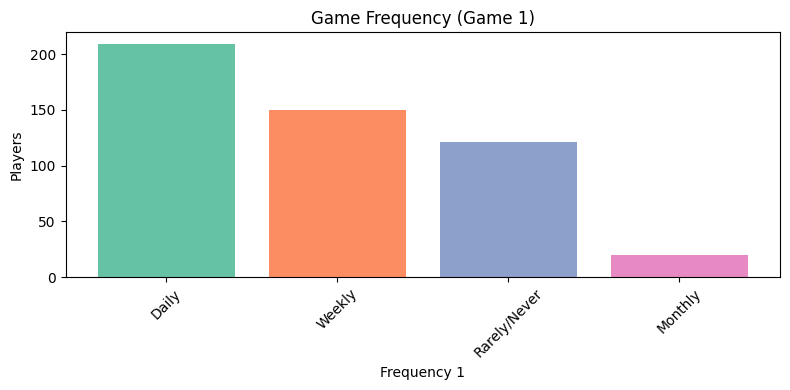

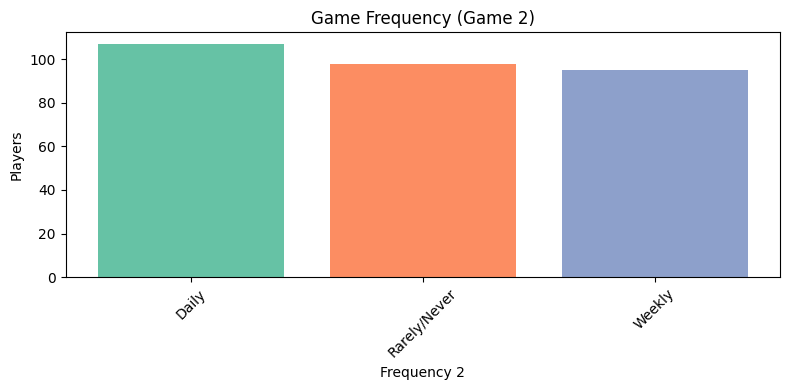

In [288]:
# Gráficas
graficar_columna_categorica(df_final, 'frequency_1', 'Game Frequency (Game 1)')
graficar_columna_categorica(df_final, 'frequency_2', 'Game Frequency (Game 2)')


### 🎮 Frecuencia de juego

#### 📊 Juego nº1
- **Daily (diariamente)**: Claramente la categoría más alta, con **más de 200 jugadores**.
- **Weekly (semanalmente)**: Segunda más común, aunque con una **caída notable** respecto a Daily.
- **Rarely/Never (raramente/nunca)** y **Monthly (mensualmente)**: Mucho menos frecuentes, especialmente Monthly.

🟢 **Conclusión**: El juego nº1 elegido es un juego con **alta recurrencia**; la mayoría juega a diario, lo que sugiere **enganche o hábito**.

---

#### 📊 Juego nº2
- **Daily**, **Rarely/Never** y **Weekly** están más equilibrados, con **valores similares** (alrededor de 100).
- **No aparece Monthly**, por falta de registros.

🟠 **Conclusión**: El juego nº2 elegido tiene una distribución **menos concentrada**, con jugadores que lo usan tanto **regularmente** como **esporádicamente**.

---

#### 📌 Conclusiones generales
- El **juego nº1** parece más **popular o adictivo**, con **mayor fidelidad diaria**.
- El **juego nº2** tiene **menor compromiso**: muchos usuarios lo prueban pero **no lo incorporan en su rutina diaria**.



In [289]:
# Media de horas jugadas por frecuencia para el juego nº1
df_final.groupby("frequency_1")["hours_per_week_1"].value_counts().sort_index()

frequency_1   hours_per_week_1  
Daily         10–20 hours           68
              1–5 hours             37
              5–10 hours            67
              More than 20 hours    37
Monthly       10–20 hours            4
              1–5 hours              6
              5–10 hours             2
              Less than 1 hour       6
              More than 20 hours     2
Rarely/Never  0 hours                6
              10–20 hours           25
              1–5 hours             26
              5–10 hours            36
              More than 20 hours    28
Weekly        10–20 hours           38
              1–5 hours             43
              5–10 hours            56
              More than 20 hours    13
Name: count, dtype: int64

In [290]:
# Media de horas jugadas por frecuencia para el juego nº2
df_final.groupby("frequency_2")["hours_per_week_2"].value_counts().sort_index()

frequency_2   hours_per_week_2  
Daily         10–20 hours           24
              1–5 hours             27
              5–10 hours            29
              More than 20 hours    27
Rarely/Never  10–20 hours           27
              1–5 hours             22
              5–10 hours            21
              More than 20 hours    28
Weekly        10–20 hours           21
              1–5 hours             31
              5–10 hours            20
              More than 20 hours    23
Name: count, dtype: int64

### 🔴 Game 1 – Relación entre frecuencia y horas jugadas

- Como es esperable, los jugadores que afirman jugar **diariamente (Daily)** son quienes más horas dedican: principalmente **10–20 h** y **5–10 h**.
- Los jugadores **semanales (Weekly)** también se concentran en los rangos **5–10 h** y **1–5 h**, con un grupo más reducido en **más de 20 h**.
- El grupo **mensual (Monthly)** presenta un reparto más equilibrado entre rangos bajos y medios, con mayor peso en **1–5 h** y algo de presencia en **10–20 h**.
- Quienes juegan **rara vez o nunca (Rarely/Never)** apenas dedican tiempo, lo que refuerza la coherencia de las respuestas.

🔍 **Interpretación:**
Hay una relación clara entre la frecuencia auto-reportada y el número de horas reales jugadas. El juego nº1 refleja un alto grado de compromiso y consistencia entre lo que se declara y lo que se juega.

---

### 🔵 Game 2 – Relación entre frecuencia y horas jugadas

- Los jugadores **diarios** muestran una distribución similar a los del juego nº1, aunque con valores más bajos en cada franja (más moderados).
- En **frecuencia semanal**, los datos están bastante equilibrados entre **1–5 h**, **5–10 h** y **más de 20 h**, lo que indica una base más heterogénea.
- El grupo **mensual** también tiene una distribución variada, pero con menor intensidad que en el juego nº1.
- Incluso en **Rarely/Never**, hay jugadores dedicando **más de 20 h**, lo cual podría indicar cierta contradicción o juegos intermitentes pero intensos.

🔍 **Interpretación:**
El juego nº2 muestra una relación más **dispersa** entre frecuencia y horas jugadas. Esto sugiere menor consistencia o compromiso, o quizá un estilo de juego más casual e intermitente.

---

### 📌 Comparativa final

- El juego nº 1 mantiene un patrón predecible y coherente: a mayor frecuencia declarada, más horas jugadas.
- El juego nº 2 tiene una dinámica más difusa, posiblemente por tratarse de un juego más nuevo, casual o explorado de forma intermitente por los jugadores.



## 1.2. Comparativa por dispositivo – Horas semanales jugadas

In [291]:
# Horas por semana de juego nº1
df_final['hours_per_week_1'].value_counts(dropna=False)

hours_per_week_1
5–10 hours            161
10–20 hours           135
1–5 hours             112
More than 20 hours     80
0 hours                 6
Less than 1 hour        6
Name: count, dtype: int64

In [292]:
# Horas por semana de juego nº2
df_final['hours_per_week_2'].value_counts(dropna=False)

hours_per_week_2
nan                   200
1–5 hours              80
More than 20 hours     78
10–20 hours            72
5–10 hours             70
Name: count, dtype: int64

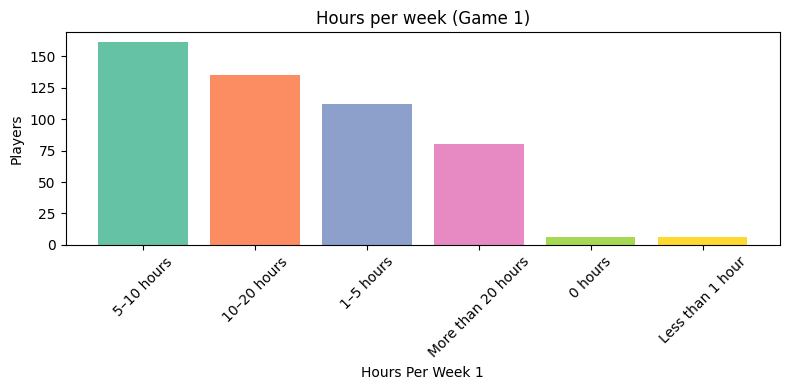

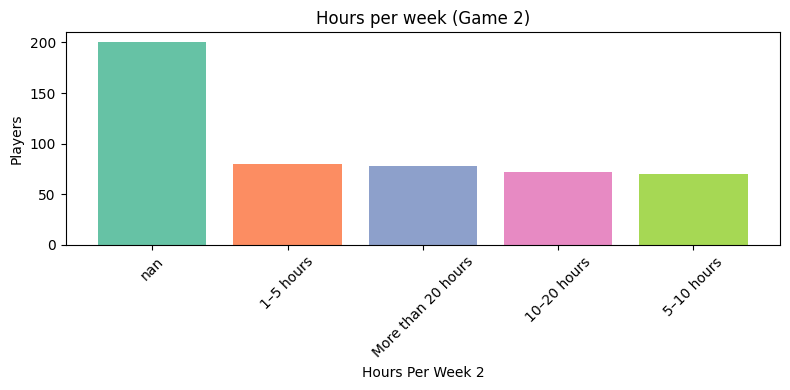

In [293]:
# Gráfico
graficar_columna_categorica(df_final, 'hours_per_week_1', 'Hours per week (Game 1)')
graficar_columna_categorica(df_final, 'hours_per_week_2', 'Hours per week (Game 2)')

### ⏱️ Comparativa: Horas de juego semanales

#### 🔹 Game 1:
- La mayoría de los jugadores dedican entre **5 y 10 horas semanales**.
- Le siguen de cerca los grupos de **10–20 h** y **1–5 h**.
- Hay una participación **visible incluso en categorías como "más de 20 h"**.
- Muy pocos jugadores marcan **0 h o menos de 1 h** (como era esperable si el juego gusta).

#### 🔹 Game 2:
- La distribución es mucho más **plana**: no hay un pico claro.
- Destaca que hay más **valores faltantes (`nan`)**, lo que indica que muchos jugadores **no han respondido que tienen un segundo juego favorito**.
- Las horas están más **repartidas y con menor volumen** en cada franja.

---

### 🧠 Conclusiones clave:

- El **juego nº1** parece tener una base de jugadores más **comprometida**: se observa un patrón claro de uso semanal, incluso con jugadores dedicando más de **10 o incluso 20 horas semanales**.
- El **juego nº2** muestra un uso más **ocasional** o **menor fidelidad**: la mayoría de categorías tienen pocos jugadores y muchos valores ausentes. Esto puede indicar que fue **menos atractivo, más nuevo o más casual**.

---

### 📊 Interpretación general:

- **Juego nº1** → más **“adictivo” o competitivo**.  
- **Juego nº2** → más **experimental** o no tan integrado en la rutina de juego de los usuarios.

---

### ❓ Posibles causas de los `nan` en Game 2:
- **Respuestas omitidas por desinterés**.


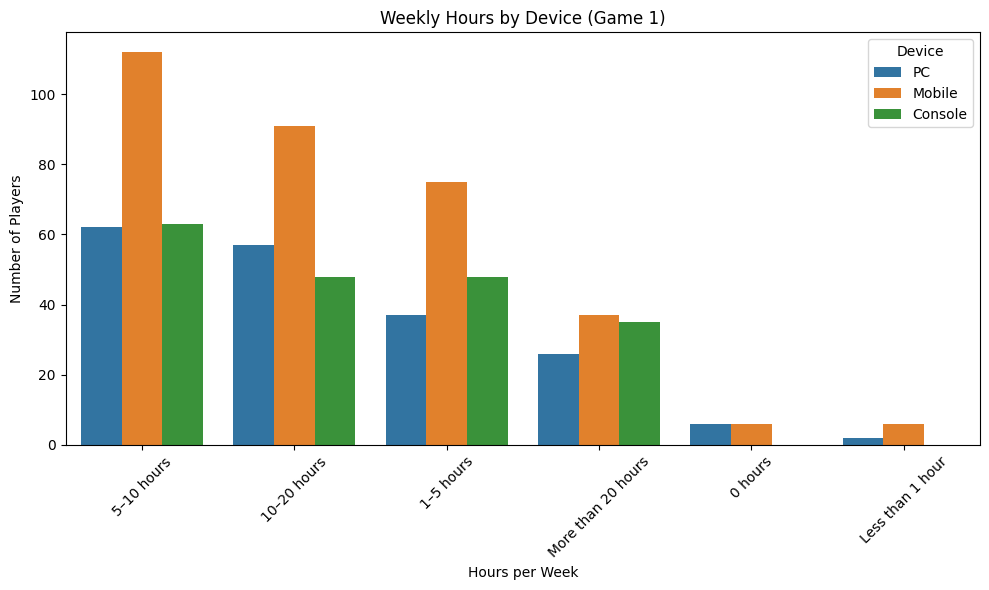

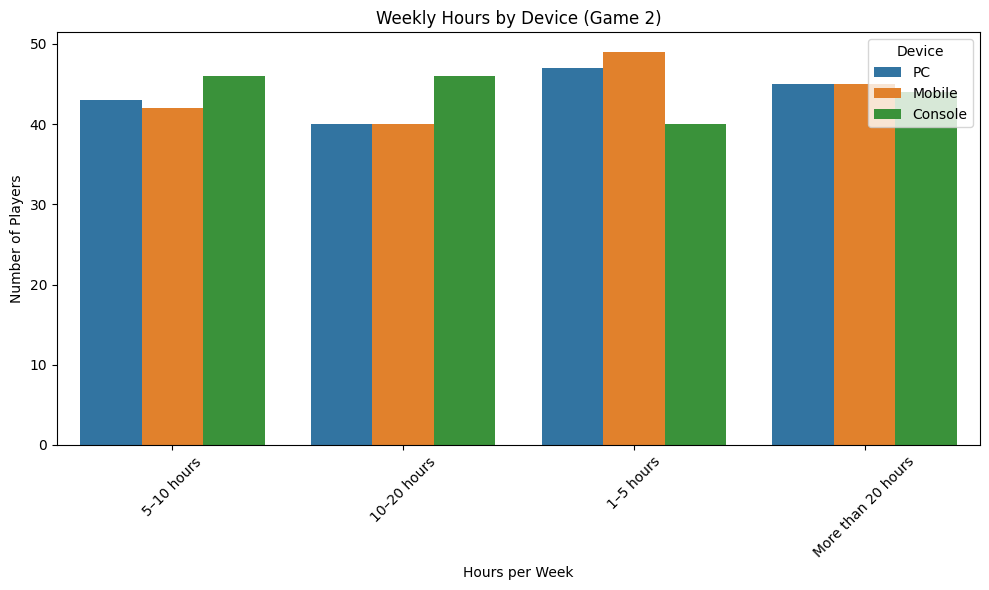

In [294]:
# Comparativa Dispositivos y horas por semana
# Datos para Game 1
game1_data = {
    "Device": ["PC", "PC", "PC", "PC", "PC", "PC",
               "Mobile", "Mobile", "Mobile", "Mobile", "Mobile", "Mobile",
               "Console", "Console", "Console", "Console", "Console", "Console"],
    "Hours": ["5–10 hours", "10–20 hours", "1–5 hours", "More than 20 hours", "0 hours", "Less than 1 hour"] * 3,
    "Players": [62, 57, 37, 26, 6, 2,
                112, 91, 75, 37, 6, 6,
                63, 48, 48, 35, 0, 0]
}

df_game1 = pd.DataFrame(game1_data)

# Datos para Game 2
game2_data = {
    "Device": ["PC", "PC", "PC", "PC",
               "Mobile", "Mobile", "Mobile", "Mobile",
               "Console", "Console", "Console", "Console"],
    "Hours": ["5–10 hours", "10–20 hours", "1–5 hours", "More than 20 hours"] * 3,
    "Players": [43, 40, 47, 45,
                42, 40, 49, 45,
                46, 46, 40, 44]
}

df_game2 = pd.DataFrame(game2_data)

# Gráfico Game 1
plt.figure(figsize=(10, 6))
sns.barplot(data=df_game1, x="Hours", y="Players", hue="Device")
plt.title("Weekly Hours by Device (Game 1)")
plt.xlabel("Hours per Week")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico Game 2
plt.figure(figsize=(10, 6))
sns.barplot(data=df_game2, x="Hours", y="Players", hue="Device")
plt.title("Weekly Hours by Device (Game 2)")
plt.xlabel("Hours per Week")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📘 Game 1

- **PC**: Muestra una distribución escalonada, con predominio de jugadores en los tramos **5–10h** y **10–20h**, pero también con representación en tramos bajos y altos.
- **Móvil**: Es el dispositivo con mayor número de jugadores. Destaca una fuerte concentración en los tramos **5–10h** y **10–20h**, pero también hay bastantes usuarios entre **1–5h**. Se observa un perfil más comprometido.
- **Consola**: Tiene una distribución similar al PC, aunque ligeramente menos poblada en las franjas altas. Casi no hay usuarios que reporten **0h** o **<1h**.

🔍 **Interpretación:**
> En Game 1, el **móvil** es el dispositivo más utilizado y con mayor dedicación semanal. El **PC** y la **consola** comparten un patrón estable con cierta variedad, pero menor número de jugadores. Se refleja un uso intensivo, especialmente en móvil, probablemente asociado a la accesibilidad del juego.

---

### 📗 Game 2

- **PC, móvil y consola** presentan distribuciones muy similares.
- La mayoría de usuarios en los tres dispositivos se concentran entre las franjas **1–5h**, **5–10h**, **10–20h**, con diferencias poco marcadas entre ellos.
- No hay picos claros ni dispositivos dominantes.

🔍 **Interpretación:**
> En Game 2 se aprecia una **distribución equilibrada** entre dispositivos. No hay un líder claro en uso ni intensidad de juego. Esto sugiere que Game 2 tiene un enfoque más flexible o casual, y que no está diseñado de forma preferente para un solo tipo de dispositivo.

---

📌 **Conclusión general:**
- **Game 1** presenta mayor compromiso en móviles, seguido de PC y consola.
- **Game 2** tiene un perfil de usuario más uniforme y relajado, donde todos los dispositivos se usan de forma similar.


## 1.3. Juegos favoritos según horas jugadas por semana

In [295]:
# Limpiar espacios en los valores
df_final["hours_per_week_1"] = df_final["hours_per_week_1"].str.strip()

# Volver a aplicar el filtro
horas_activas = ["10-20 hours", "More than 20 hours"]
jugadores_activos = df_final[df_final["hours_per_week_1"].isin(horas_activas)]


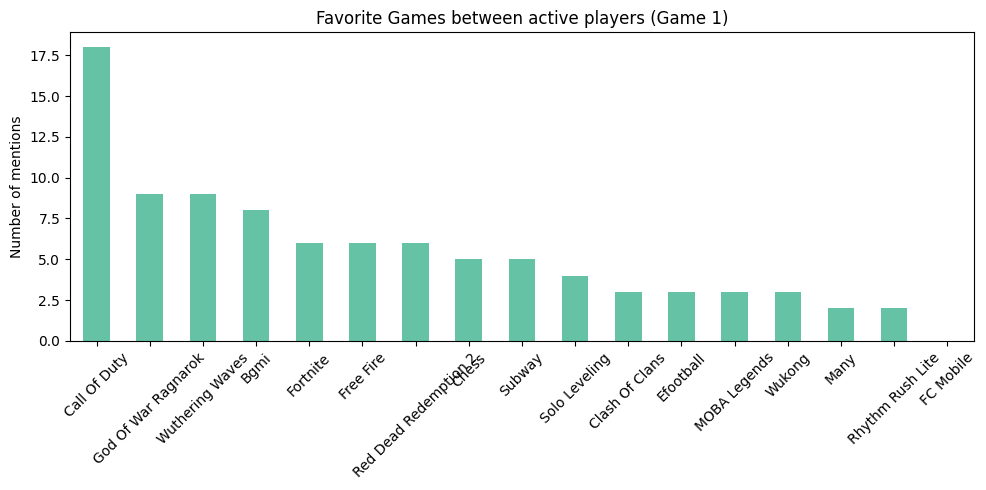

In [296]:
# Game 1
# 1. Definir qué categorías indican jugadores activos
horas_activas = ["10-20 hours", "More than 20 hours"]

# 2. Filtrar DataFrame para quedarnos solo con jugadores más activos
jugadores_activos = df_final[df_final["hours_per_week_1"].isin(horas_activas)]

# 3. Seleccionar columnas de juegos favoritos (Game 1)
cols_juegos = [col for col in df_final.columns if col.startswith("favorite_game1_")]

# 4. Contar cuántos jugadores activos mencionan cada juego
juegos_frecuentes = jugadores_activos[cols_juegos].sum().sort_values(ascending=False)

# 5. Limpiar nombres de columnas
juegos_frecuentes.index = juegos_frecuentes.index.str.replace("favorite_game1_", "")

# 6. Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
juegos_frecuentes.plot(kind="bar", color="#66c2a5")
plt.title("Favorite Games between active players (Game 1)")
plt.ylabel("Number of mentions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

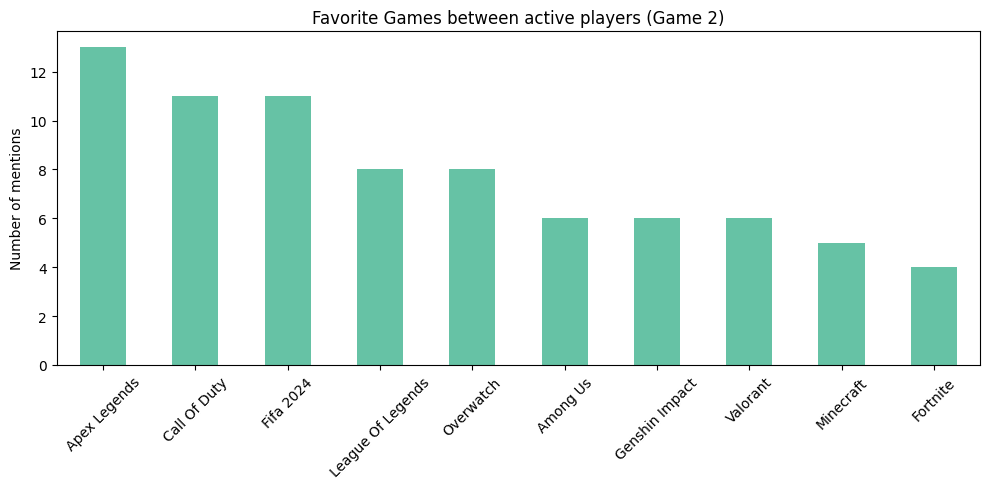

In [297]:
# Game 2
# 1. Definir qué categorías indican jugadores activos
horas_activas = ["10-20 hours", "More than 20 hours"]

# 2. Filtrar DataFrame para quedarnos solo con jugadores más activos
jugadores_activos = df_final[df_final["hours_per_week_2"].isin(horas_activas)]

# 3. Seleccionar columnas de juegos favoritos (Game 2)
cols_juegos = [col for col in df_final.columns if col.startswith("favorite_game2_")]

# 4. Contar cuántos jugadores activos mencionan cada juego
juegos_frecuentes = jugadores_activos[cols_juegos].sum().sort_values(ascending=False)

# 5. Limpiar nombres de columnas
juegos_frecuentes.index = juegos_frecuentes.index.str.replace("favorite_game2_", "")

# 6. Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
juegos_frecuentes.plot(kind="bar", color="#66c2a5")
plt.title("Favorite Games between active players (Game 2)")
plt.ylabel("Number of mentions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 1.4. Motivaciones principales según horas jugadas por semana

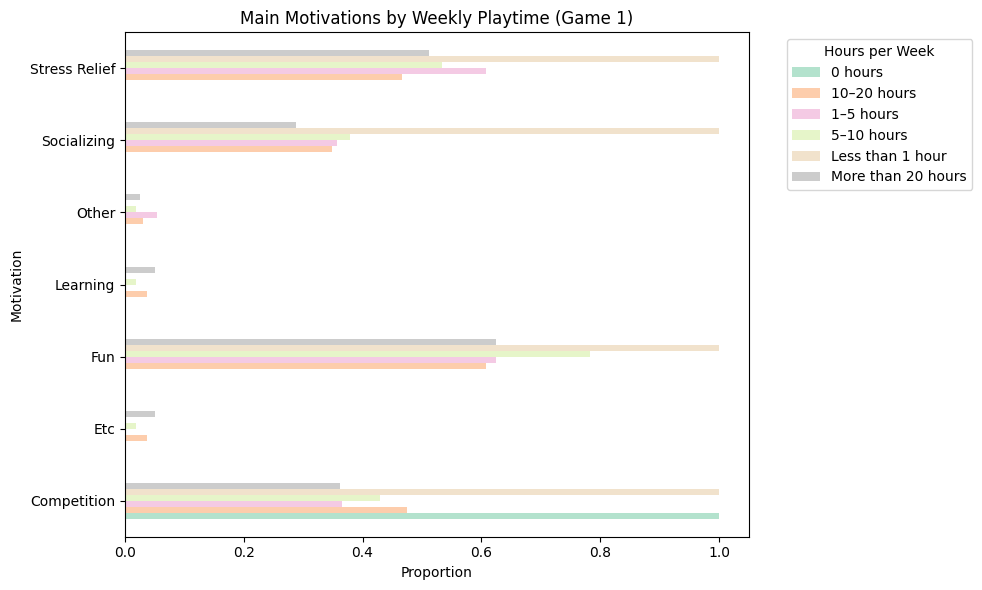

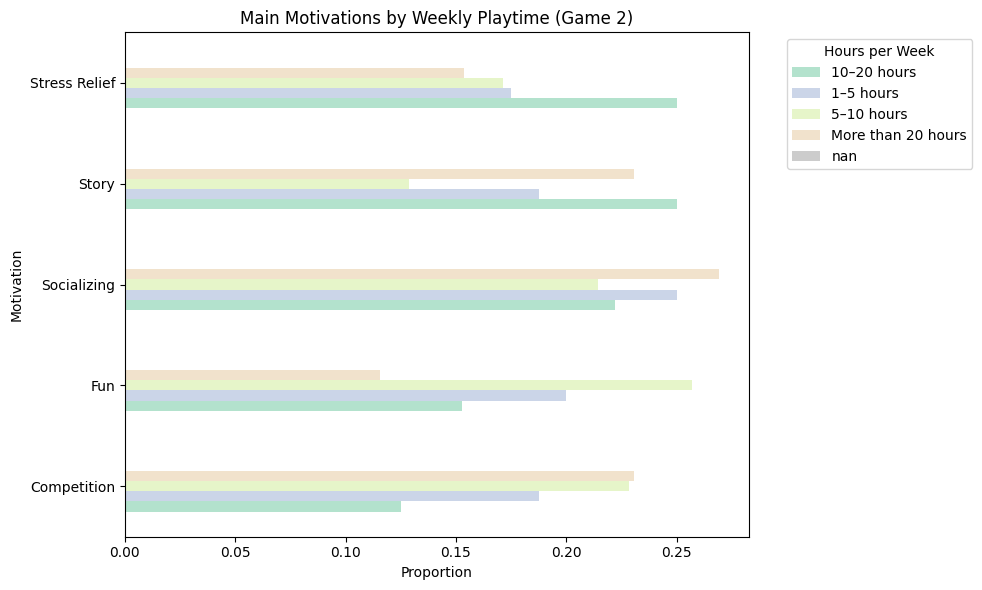

In [298]:
# Horas por semana vs motivaciones principales (Juego 1)
# Añadimos columna de horas
df_mot_hours = df_final[["hours_per_week_1"] + list(df_final.filter(like="motivation1_").columns)]

# Agrupamos por horas
motivation_by_hours = df_mot_hours.groupby("hours_per_week_1").mean()

# Limpiamos nombres de motivaciones
motivation_by_hours.columns = motivation_by_hours.columns.str.replace("motivation1_", "")

# Gráfico
motivation_by_hours.T.plot(kind="barh", figsize=(10, 6), colormap="Pastel2")
plt.title("Main Motivations by Weekly Playtime (Game 1)")
plt.xlabel("Proportion")
plt.ylabel("Motivation")
plt.legend(title="Hours per Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Horas por semana vs motivaciones principales (Juego 2)
# Añadimos columna de horas
df_mot_hours = df_final[["hours_per_week_2"] + list(df_final.filter(like="motivation2_").columns)]

# Agrupamos por horas
motivation_by_hours2 = df_mot_hours.groupby("hours_per_week_2").mean()

# Limpiamos nombres de motivaciones
motivation_by_hours2.columns = motivation_by_hours2.columns.str.replace("motivation2_", "")

# Gráfico
motivation_by_hours2.T.plot(kind="barh", figsize=(10, 6), colormap="Pastel2")
plt.title("Main Motivations by Weekly Playtime (Game 2)")
plt.xlabel("Proportion")
plt.ylabel("Motivation")
plt.legend(title="Hours per Week", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 🎮 Game 1 – Main Motivations by Weekly Playtime

- Las motivaciones **Stress Relief** y **Fun** dominan en todos los rangos de tiempo, especialmente en los jugadores que juegan **entre 10 y 20 horas** semanales.
- **Competition** gana relevancia progresivamente a medida que aumentan las horas jugadas.
- Las motivaciones como **Learning**, **Etc** u **Other** son marginales o irrelevantes en la mayoría de los grupos.
- El grupo que juega **más de 20 horas** semanales tiene una fuerte inclinación hacia **Fun** y **Competition**.

🔎 **Interpretación:**
> En Game 1, las motivaciones cambian según la implicación del jugador: quienes juegan menos buscan relajación, mientras que los jugadores más activos valoran la diversión y la competición.

---

### 🎮 Game 2 – Main Motivations by Weekly Playtime

- Las motivaciones están más **equilibradas**, con **Fun**, **Socializing** y **Stress Relief** presentes en todos los grupos.
- El grupo de **más de 20 horas** semanales muestra una preferencia clara por **Fun**, pero también destaca **Socializing**.
- En los que juegan menos horas (1–5 o 5–10), **Stress Relief** y **Socializing** tienen un peso mayor, lo que indica un uso más casual y social del juego.
- La motivación **Competition** se mantiene más baja que en Game 1, incluso entre los jugadores frecuentes.

🔎 **Interpretación:**
> En Game 2, las motivaciones son más diversas y menos centradas en la competición. El juego parece favorecer experiencias sociales, relajantes o lúdicas, independientemente del tiempo de juego.


## 1.4.  Motivaciones según modo de juego

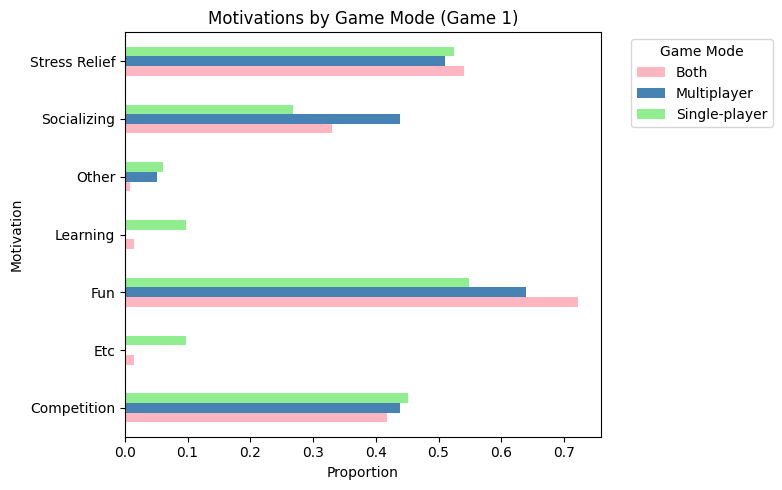

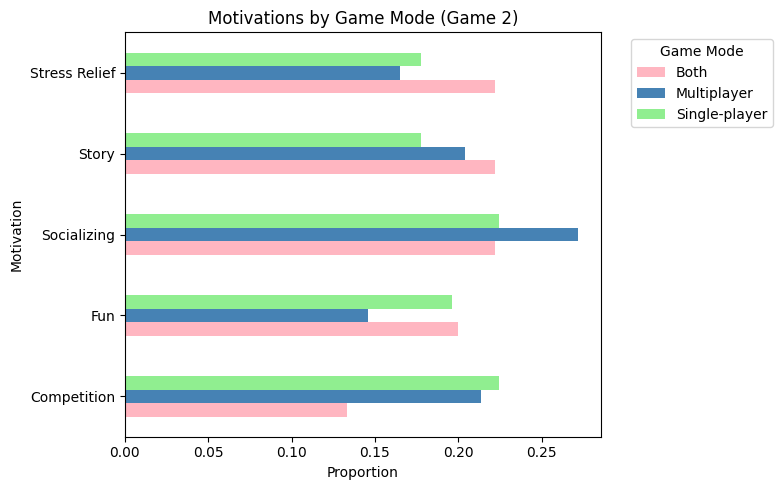

In [299]:
# Modo de juego vs Motivations (Juego 1)
# Extraemos columnas necesarias
df_game_mode = df_final.filter(like="game_mode1_").copy()
df_game_mode["motivation"] = df_final.filter(like="motivation1_").values.tolist()

# Para cada modo de juego, calculamos la media de cada motivación
mot_cols = df_final.filter(like="motivation1_").columns
game_mode_labels = df_final.filter(like="game_mode1_").columns

# Creamos un nuevo DataFrame para almacenar resultados
motivation_by_mode = {}

for mode in game_mode_labels:
    subset = df_final[df_final[mode] == 1]
    motivation_by_mode[mode.replace("game_mode1_", "")] = subset[mot_cols].mean()

# Convertimos a DataFrame y limpiamos nombres
motivation_by_mode_df = pd.DataFrame(motivation_by_mode)
motivation_by_mode_df.index = motivation_by_mode_df.index.str.replace("motivation1_", "")

# Gráfico
motivation_by_mode_df.plot(
    kind="barh",
    figsize=(8, 5),
    color=["#FFB6C1", "#4682B4", "#90EE90", "#D8BFD8", "#98FB98", "#F0E68C", "#FFDAB9"]
)
plt.title("Motivations by Game Mode (Game 1)")
plt.xlabel("Proportion")
plt.ylabel("Motivation")
plt.legend(title="Game Mode", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Modo de juego vs Motivaciones (Juego 2)
# 1. Extraemos columnas necesarias
df_game_mode2 = df_final.filter(like="game_mode2_").copy()
df_game_mode2["motivation"] = df_final.filter(like="motivation2_").values.tolist()

# 2. Identificamos columnas de motivación y etiquetas de modo de juego
mot_cols2 = df_final.filter(like="motivation2_").columns
game_mode_labels2 = df_final.filter(like="game_mode2_").columns

# 3. Creamos un nuevo diccionario para guardar resultados
motivation_by_mode2 = {}

# 4. Calculamos medias de motivación para cada modo de juego
for mode in game_mode_labels2:
    subset = df_final[df_final[mode] == 1]
    motivation_by_mode2[mode.replace("game_mode2_", "")] = subset[mot_cols2].mean()

# 5. Convertimos a DataFrame y limpiamos índices
motivation_by_mode2_df = pd.DataFrame(motivation_by_mode2)
motivation_by_mode2_df.index = motivation_by_mode2_df.index.str.replace("motivation2_", "")

# 6. Gráfico
motivation_by_mode2_df.plot(
    kind="barh",
    figsize=(8, 5),
    color=["#FFB6C1", "#4682B4", "#90EE90", "#D8BFD8", "#98FB98", "#F0E68C", "#FFDAB9"]
)
plt.title("Motivations by Game Mode (Game 2)")
plt.xlabel("Proportion")
plt.ylabel("Motivation")
plt.legend(title="Game Mode", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## 📈 1.5. Correlaciones binarias (Game 1 y Game 2)

#### Heatmap de correlación

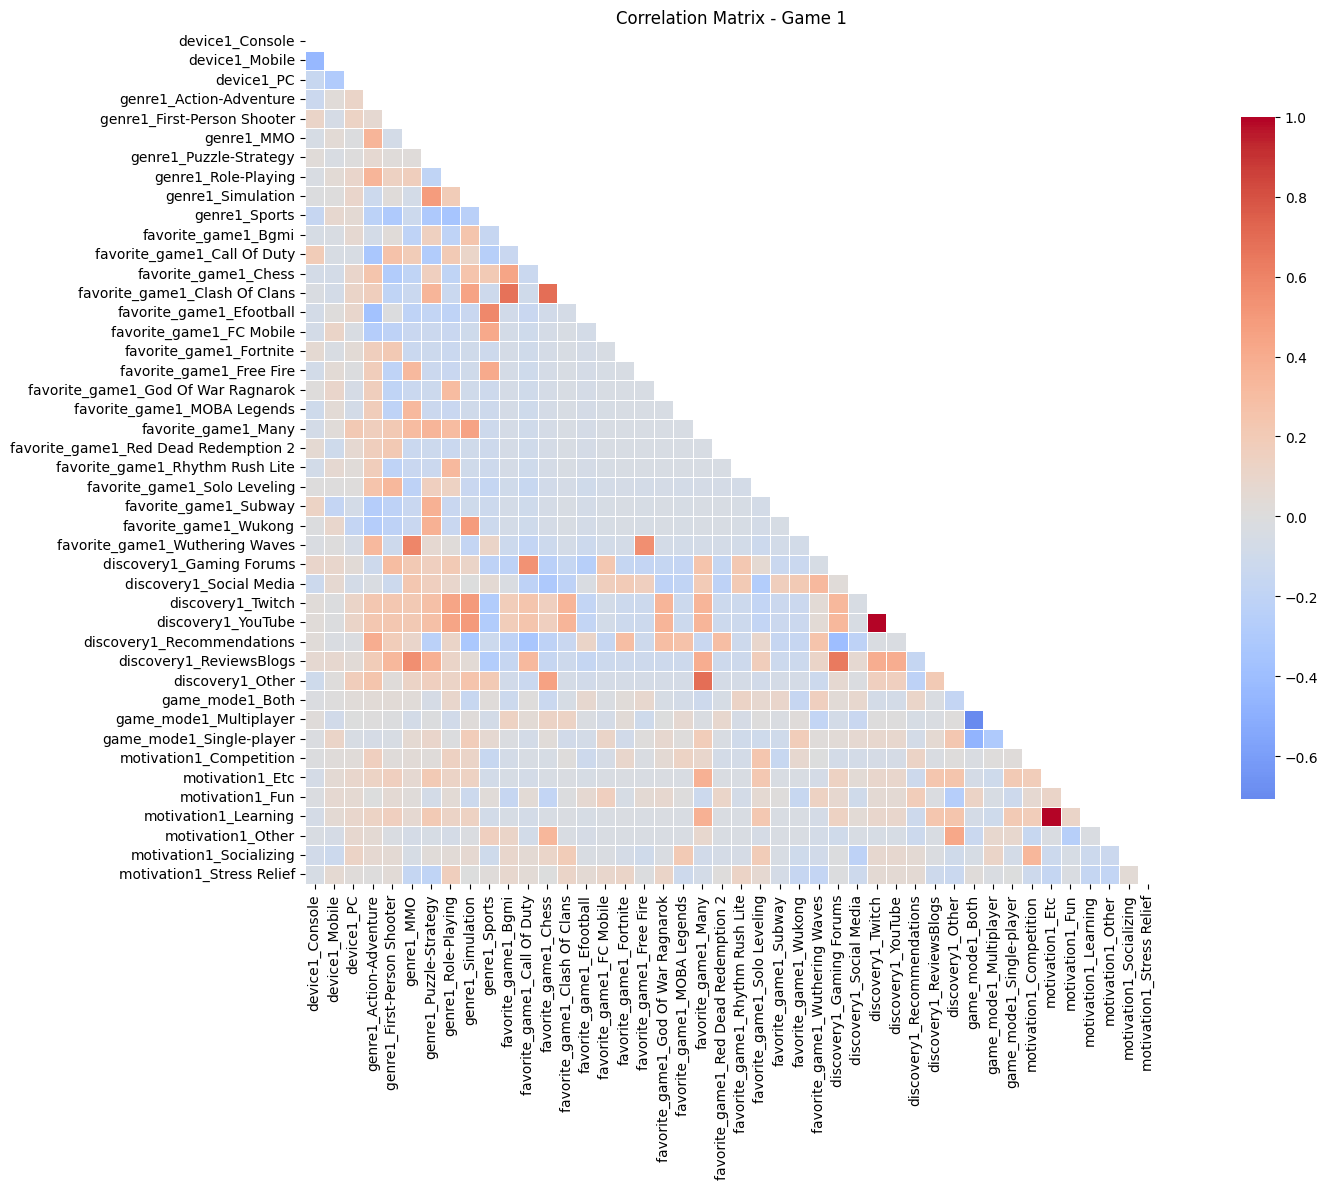

In [300]:
# Paso 1: Seleccionar columnas binarias del juego 1
binary_cols_j1 = [
    col for col in df_final.columns 
    if '1_' in col and df_final[col].dropna().isin([0, 1]).all()
]

# Paso 2: Crear sub-dataframe
df_j1 = df_final[binary_cols_j1]

# Paso 3: Crear matriz de correlaciones
corr_matrix_j1 = df_j1.corr()

# Paso 4: Máscara para mitad superior
mask = np.triu(np.ones_like(corr_matrix_j1, dtype=bool))

# Paso 5: Visualización
plt.figure(figsize=(18, 12))
sns.heatmap(
    corr_matrix_j1, 
    mask=mask, 
    cmap="coolwarm", 
    center=0, 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix - Game 1")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## 🔗 Matriz de Correlaciones (binarias) – Game 1

Asociaciones más destacadas entre plataformas, géneros, juegos favoritos, formas de descubrimiento y motivaciones de los jugadores en Game 1.

### 🎮 Plataformas

- **PC** y **Console** muestran correlación negativa, reflejando una clara preferencia excluyente entre ambas plataformas.
- **Mobile** aparece más independiente, con correlaciones suaves y sin relaciones fuertes con géneros o motivaciones.

### 🕹️ Modos de juego

- Hay alta correlación positiva entre **Both** y **Multiplayer**, indicando que quienes combinan modos tienden a jugar también en multijugador.
- **Single-player** presenta una relación negativa con **Multiplayer**, como es esperable, y se asocia débilmente a motivaciones narrativas.

### 🎯 Motivaciones

- **Competition** se relaciona con **Multiplayer** y juegos como **FPS** y **Sports**.
- **Stress Relief** y **Socializing** tienden a correlacionarse con juegos casuales y con descubrimiento a través de redes sociales.
- **Story** mantiene cierta relación con **Single-player** y géneros como **Role-Playing** o **Action-Adventure**.

### 👾 Géneros de videojuegos

- **First Person Shooter** y **Sports** se asocian entre sí y con motivaciones competitivas.
- **Puzzle-Strategy** y **Simulation** se relacionan con motivaciones más centradas en el aprendizaje o la relajación.
- **Role-Playing** y **Action-Adventure** muestran correlaciones con motivaciones narrativas y exploratorias.

### 🎮 Juegos favoritos

- Juegos como **Call of Duty**, **FIFA**, **Clash of Clans** y **Fortnite** aparecen correlacionados con **Multiplayer** y motivaciones competitivas.
- **Genshin Impact**, **God of War Ragnarok** o **Red Dead Redemption 2** muestran correlaciones más cercanas a **Single-player** y a motivaciones narrativas o de exploración.

### 🌐 Descubrimiento de juegos

- Canales como **YouTube**, **Social Media** y **Twitch** están estrechamente correlacionados entre sí.
- **Gaming Forums** y **Recommendations** tienen menor peso, pero aparecen más relacionados con jugadores que valoran la historia o el desarrollo del juego.

---

🔍 **Interpretación general:**

> En Game 1, las correlaciones reflejan perfiles bien definidos: jugadores competitivos vinculados a FPS y modos multijugador, frente a jugadores narrativos que prefieren juegos individuales y de exploración. Las plataformas también marcan diferencias clave, especialmente entre PC y consola, mientras que el móvil ocupa un rol más transversal y menos polarizado.



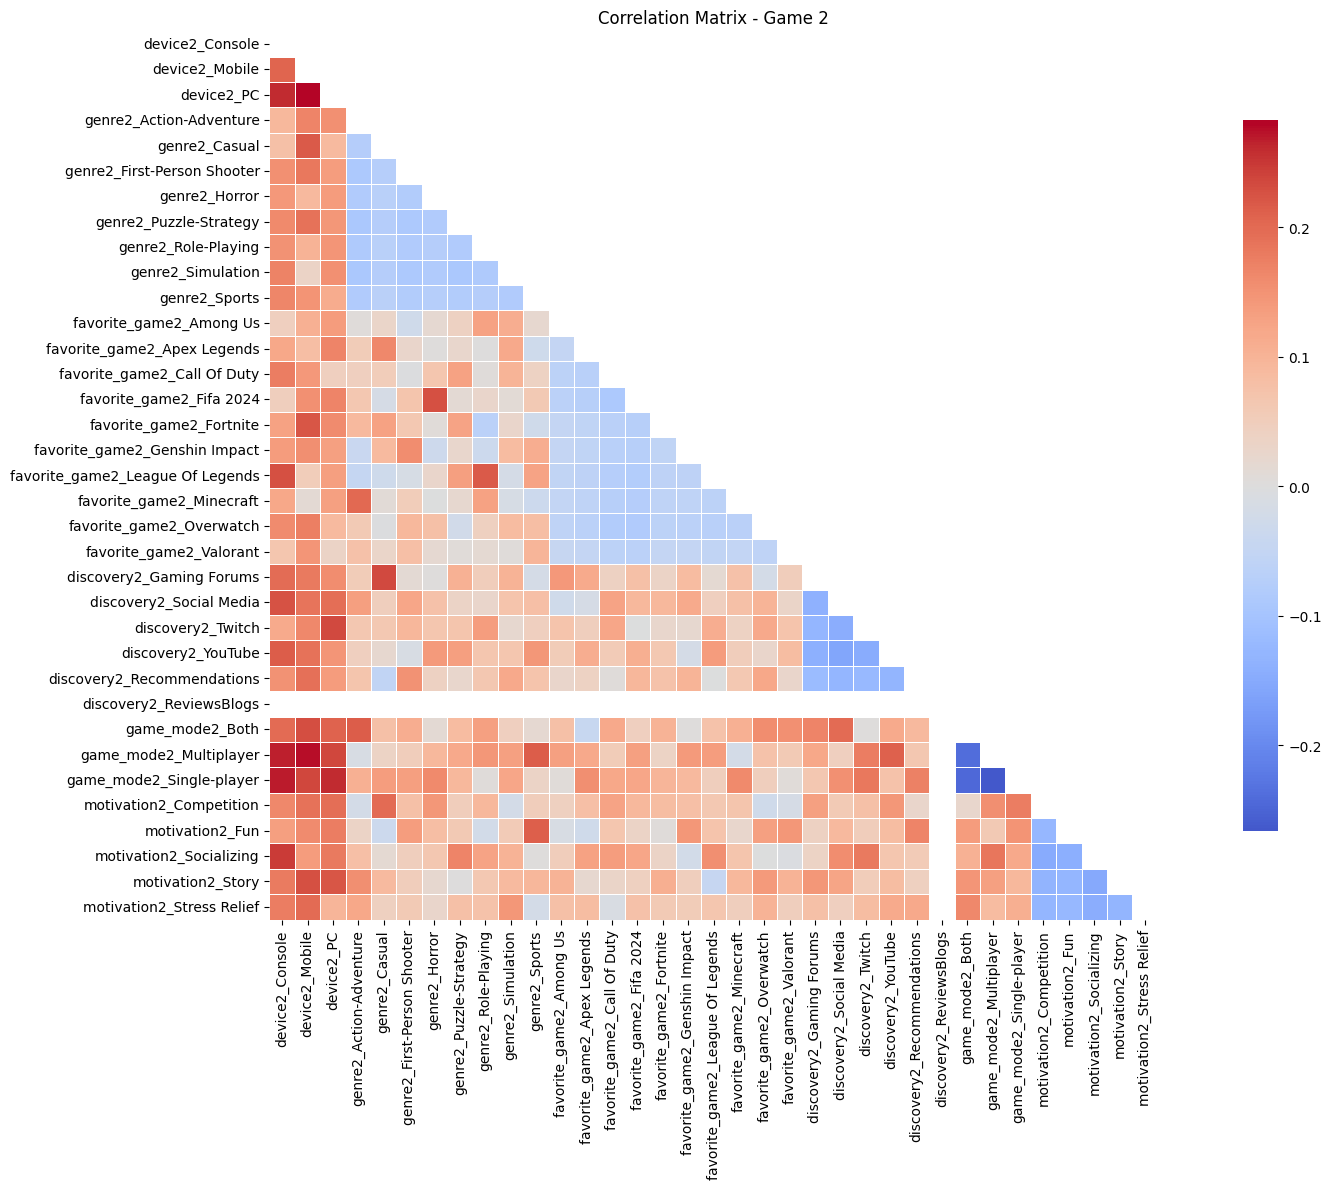

In [301]:
# Paso 1: Seleccionar columnas binarias del juego 2
binary_cols_j2 = [
    col for col in df_final.columns 
    if '2_' in col and df_final[col].dropna().isin([0, 1]).all()
]

# Paso 2: Crear sub-dataframe
df_j2 = df_final[binary_cols_j2]

# Paso 3: Crear matriz de correlaciones
corr_matrix_j2 = df_j2.corr()

# Paso 4: Máscara para mitad superior
mask = np.triu(np.ones_like(corr_matrix_j2, dtype=bool))

# Paso 5: Visualización
plt.figure(figsize=(18, 12))
sns.heatmap(
    corr_matrix_j2, 
    mask=mask, 
    cmap="coolwarm", 
    center=0, 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix - Game 2")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 🔗 Matriz de Correlaciones (binarias) – Game 2

### 🎮 Plataformas

- **PC** muestra una correlación negativa con **Mobile** y **Console**, indicando que los jugadores suelen elegir un único dispositivo predominante.
- Se aprecia una ligera asociación entre **PC** y modos de juego como **Multiplayer**.

### 🔎 Modos de juego

- **Both** y **Multiplayer** tienen una correlación positiva muy alta, lo que sugiere que quienes juegan en ambos modos tienden a incluir partidas multijugador.
- **Single-player** presenta correlaciones más bajas, y en ocasiones negativas con motivaciones como **Competition** o plataformas más sociales.

### 🎯 Motivaciones

- **Competition** y **Fun** están asociadas positivamente con **Multiplayer**, y en menor medida con jugadores que prefieren juegos como **FPS** o **MOBA**.
- **Story** y **Stress Relief** se relacionan más con **Single-player** y juegos como **Role-Playing** o **Casual**.

### 👾 Géneros de videojuegos

- **First Person Shooter** y **Sports** tienen correlaciones positivas entre sí y con motivaciones como **Competition**.
- **Puzzle-Strategy** y **Casual** se asocian más con **Stress Relief** o **Fun**, y aparecen algo desligados del entorno competitivo.
- Los géneros como **Role-Playing** y **Action-Adventure** se vinculan con **Story** y **Single-player**.

### 🕹️ Juegos favoritos

- Juegos como **Valorant**, **Call of Duty** o **FIFA 2024** están relacionados entre sí y correlacionan con **Multiplayer** y **Competition**.
- Juegos como **Genshin Impact** o **Minecraft** se asocian con motivaciones de exploración y juego individual, y aparecen vinculados a **Single-player**.

### 🌐 Descubrimiento de juegos

- El descubrimiento por **Social Media**, **YouTube** y **Twitch** presenta correlaciones entre sí, formando un bloque cohesivo.
- Canales como **Gaming Forums** o **Recommendations** tienen menor relación con motivaciones competitivas, pero mayor con juegos casuales o narrativos.

---

🔍 **Interpretación general:**

> En Game 2, se observan patrones más definidos de correlación entre tipo de jugador y sus preferencias. Las plataformas y modos de juego se relacionan estrechamente con las motivaciones y géneros favoritos. Además, el descubrimiento del juego refuerza estos patrones, sugiriendo perfiles de jugadores bien diferenciados.


## Pregunta 2: ¿Hay diferencias claras según género o edad?
## 2.1. Distribución por edad

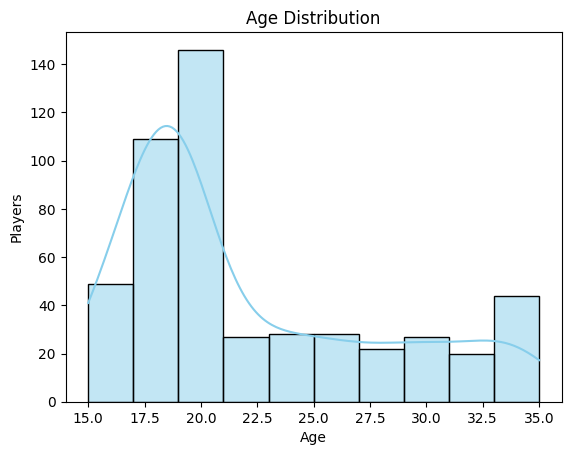

In [302]:
sns.histplot(df_final['age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Players')
plt.show()

### 🎂 Conclusiones clave – Distribución por edad

1. **Edad media**:  
   - Media: **21.94 años**  
   - Mediana: **20 años**  
   - Rango: de **15 a 35 años**

2. **Distribución**:  
   - La mayor parte de los jugadores tiene entre **15 y 22 años**.  
   - Hay una gran concentración en torno a los **17-18 años** (pico más alto).  
   - La curva KDE muestra una **caída rápida** después de los 22 años y un **leve repunte a los 35** (posiblemente un grupo puntual).

3. **Conclusión general**:  
   - Se trata de una población claramente **joven**


## 2.2. Edad por género

In [303]:
# Género
df_final['gender'].value_counts(dropna=False)


gender
Female    268
Male      232
Name: count, dtype: int64

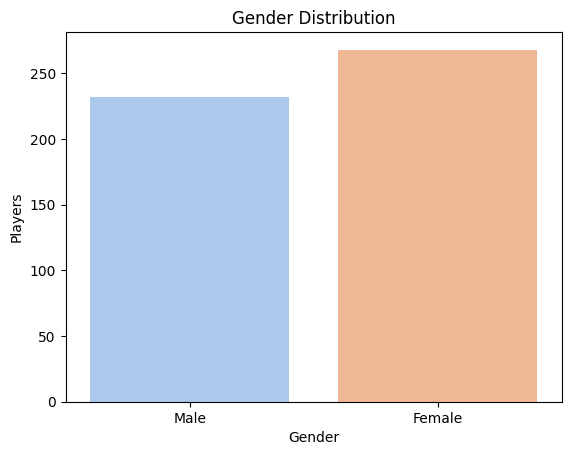

In [304]:
sns.countplot(x='gender', hue='gender', data=df_final, palette='pastel')
plt.title('Gender Distribution')
plt.ylabel('Players')
plt.xlabel('Gender')
plt.show()

#### Conclusión: Hay más mujeres que hombres en los datos

In [305]:
# Edad
df_final['age'].describe()

count    500.000000
mean      21.948000
std        5.682771
min       15.000000
25%       18.000000
50%       19.000000
75%       26.000000
max       35.000000
Name: age, dtype: float64

In [306]:
# Edad media según género
df_final.groupby("gender")["age"].mean()

gender
Female    21.384328
Male      22.599138
Name: age, dtype: float64

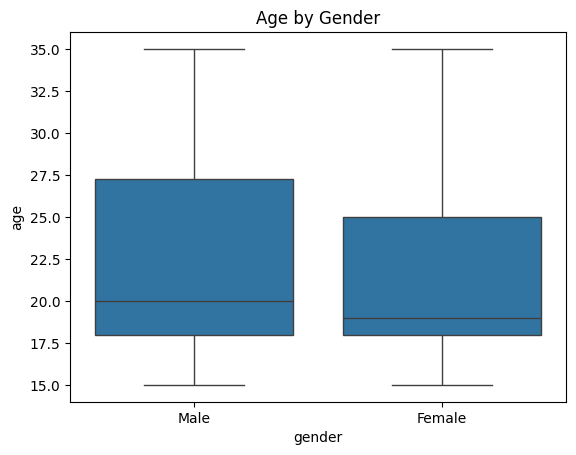

In [307]:
# Boxplot de edad según género
sns.boxplot(x="gender", y="age", data=df_final)
plt.title("Age by Gender")
plt.show()

In [308]:
# Separar las edades por género
edades_m = df_final[df_final['gender'] == 'Male']['age']
edades_f = df_final[df_final['gender'] == 'Female']['age']

# Test de Mann-Whitney
stat, p = mannwhitneyu(edades_m, edades_f, alternative='two-sided')

print(f'Estadístico U: {stat:.2f}, p-valor: {p:.4f}')


Estadístico U: 35126.00, p-valor: 0.0116


## 📊 Conclusiones clave – Edad y Género

### 🧓 Edad media por género:
- **Media de edad general:** ~21.9 años
- **Mediana:** 20 años
- **Rango de edades:** De *15 a 35 años**
- **Edad media por género:**
  - **Hombres:** ~22.3 años
  - **Mujeres:** ~20.9 años

### 📦 Distribución de edad por género (boxplot):
- La distribución de edades es **más amplia en hombres**, con mayor presencia en los extremos.
- En mujeres, la edad está más concentrada en torno a los **17-20 años**.
- Se observa un **ligero sesgo hacia edades más bajas en mujeres**.

### 🧪 Resultado estadístico – Test de Mann-Whitney U:
- **U = 35126.00**, **p-valor = 0.0116**
- ✅ **Conclusión**: La diferencia de edad entre hombres y mujeres es **estadísticamente significativa**.
- Aunque visualmente pueda parecer leve, la prueba confirma que las distribuciones **no son iguales**.

### 🧠 Interpretación general:
- La mayoría de jugadores pertenece a una población joven (entre 15 y 22 años), posiblemente estudiantes.
- La diferencia de edad por género puede influir en:
  - Preferencias de juego
  - Motivaciones para jugar
  - Dispositivos utilizados


## 2.3. Motivaciones por género

In [309]:
# Motivación juego nº1
df_final.filter(like='motivation1_').sum().sort_values(ascending=False)

motivation1_Fun              334
motivation1_Stress Relief    264
motivation1_Competition      215
motivation1_Socializing      177
motivation1_Other             15
motivation1_Etc               12
motivation1_Learning          12
dtype: int64

In [310]:
# Motivación juego nº2
df_final.filter(like='motivation2_').sum().sort_values(ascending=False)

motivation2_Socializing      72
motivation2_Story            60
motivation2_Competition      58
motivation2_Stress Relief    56
motivation2_Fun              54
dtype: int64

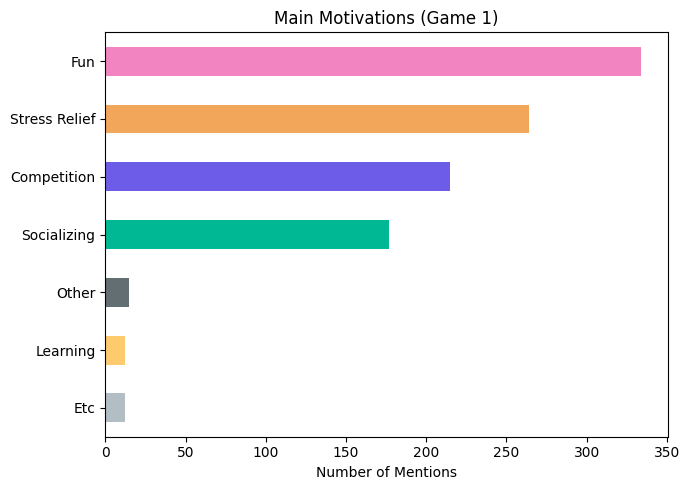

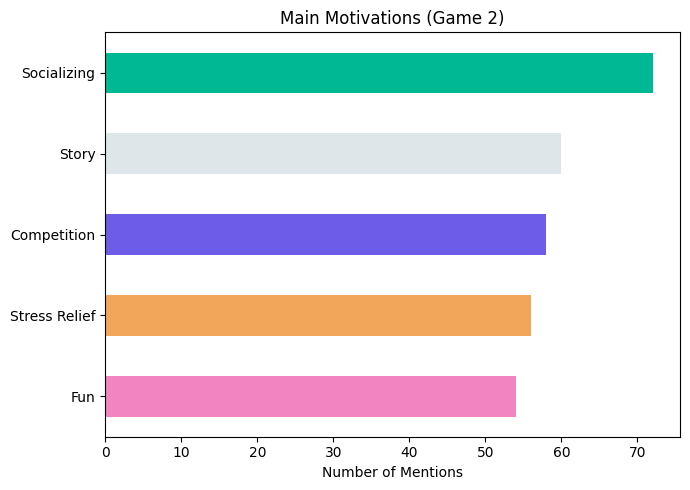

In [311]:
# Diccionario de colores por motivación
color_motivaciones = {
    'Fun': '#f285c1',
    'Stress Relief': '#f2a65a',
    'Competition': '#6c5ce7',
    'Socializing': '#00b894',
    'Learning': '#fdcb6e',
    'Other': '#636e72',
    'Etc': '#b2bec3'
}

# --- GAME 1 ---
data1 = df_final.filter(like='motivation1_').sum()
data1.index = data1.index.str.replace('motivation1_', '')
data1 = data1.sort_values()
colores1 = [color_motivaciones.get(m, '#dfe6e9') for m in data1.index]

data1.plot(kind='barh', figsize=(7, 5), color=colores1)
plt.title('Main Motivations (Game 1)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()

# --- GAME 2 ---
data2 = df_final.filter(like='motivation2_').sum()
data2.index = data2.index.str.replace('motivation2_', '')
data2 = data2.sort_values()
colores2 = [color_motivaciones.get(m, '#dfe6e9') for m in data2.index]

data2.plot(kind='barh', figsize=(7, 5), color=colores2)
plt.title('Main Motivations (Game 2)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()



## 🎯 Conclusiones clave – Motivaciones para jugar

### 🕹️ Game 1:
- La motivación principal es **la diversión** ("Fun"), con diferencia respecto al resto.
- Le siguen **alivio del estrés** y **competición**, que también tienen un peso relevante.
- **Socializar** ocupa un lugar destacado, lo que sugiere que el componente social es importante.
- Otras motivaciones como **aprender**, **otros motivos** o **etc.** son muy marginales.

### 🧪 Game 2:
- La distribución es mucho más equilibrada.
- La motivación más mencionada es **Socializing**, seguida por **Story**, **Competition**, **Stress Relief** y **Fun**.
- Esto refleja un perfil más variado y posiblemente menos centrado en el juego competitivo.

### 📌 Conclusiones generales:
- El **juego 1** parece estar más orientado al entretenimiento y la competición, lo que lo hace más adictivo o emocionante para jugadores frecuentes.
- El **juego 2** se asocia a una experiencia más diversa, donde el **componente narrativo y social** gana importancia.
- El menor número de menciones en Game 2 se debe a que hubo menos respuestas sobre juego nº2.


In [312]:
# Porcentaje de jugadores por motivación y género para el juego nº1
df_final.groupby("gender")[df_final.filter(like="motivation1_").columns].mean() * 100


,motivation1_Competition,motivation1_Etc,motivation1_Fun,motivation1_Learning,motivation1_Other,motivation1_Socializing,motivation1_Stress Relief
gender,,,,,,,
Female,43.283582,2.238806,66.791045,2.238806,2.238806,35.447761,55.970149
Male,42.672414,2.586207,66.810345,2.586207,3.879310,35.344828,49.137931


In [313]:
# Porcentaje de jugadores por motivación y género para el juego nº2
df_final.groupby("gender")[df_final.filter(like="motivation2_").columns].mean() * 100

,motivation2_Competition,motivation2_Fun,motivation2_Socializing,motivation2_Story,motivation2_Stress Relief
gender,,,,,
Female,12.313433,11.567164,11.194030,8.208955,10.820896
Male,10.775862,9.913793,18.103448,16.379310,11.637931


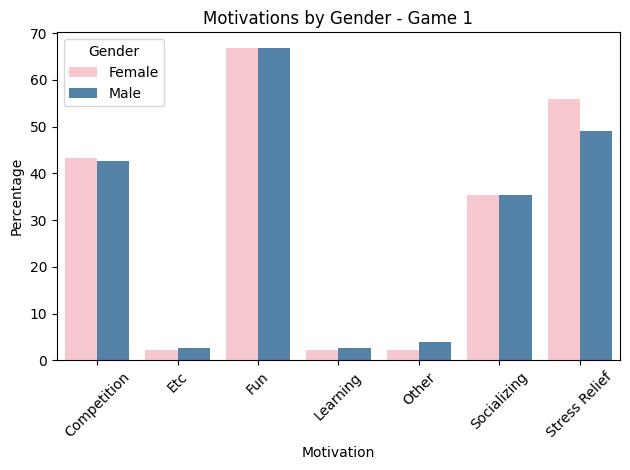

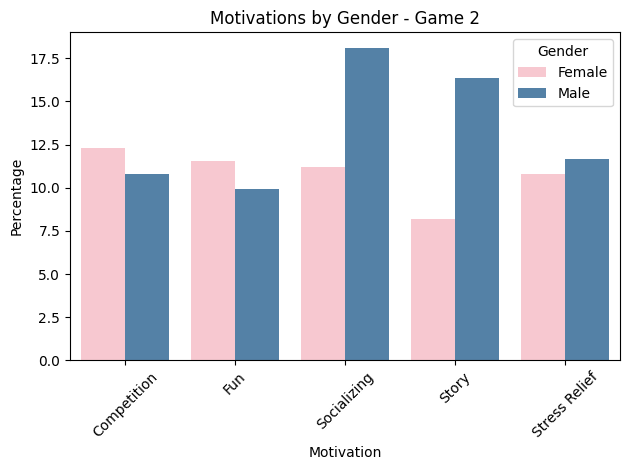

In [314]:
# Motivaciones por género - Game 1
df_mot_gen_1 = df_final.filter(like="motivation1_").copy()
df_mot_gen_1["Gender"] = df_final["gender"].copy()

df_mot_gen_1 = df_mot_gen_1.dropna(subset=["Gender"])
df_mot_gen_1 = df_mot_gen_1[df_mot_gen_1["Gender"].isin(["Female", "Male"])]
df_mot_gen_1["Gender"] = df_mot_gen_1["Gender"].astype(str)

df_plot_1 = df_mot_gen_1.groupby("Gender").mean().T.reset_index()
df_plot_1.iloc[:, 1:] *= 100
df_plot_1["Motivation"] = df_plot_1["index"].str.replace("motivation1_", "")
df_plot_1 = df_plot_1.drop(columns=["index"])  

df_plot_1_melted = df_plot_1.melt(id_vars="Motivation", var_name="Gender", value_name="Percentage")
df_plot_1_melted = df_plot_1_melted[df_plot_1_melted["Gender"].isin(["Female", "Male"])]

sns.barplot(
    data=df_plot_1_melted,
    x="Motivation",
    y="Percentage",
    hue="Gender",
    palette={"Female": "pink", "Male": "steelblue"}
)

plt.title("Motivations by Gender - Game 1")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 1. Filtrar motivaciones y género
df_mot_gen_2 = df_final.filter(like="motivation2_").copy()
df_mot_gen_2["Gender"] = df_final["gender"].copy()

# 2. Eliminar nulos y asegurar categorías válidas
df_mot_gen_2 = df_mot_gen_2.dropna(subset=["Gender"])
df_mot_gen_2 = df_mot_gen_2[df_mot_gen_2["Gender"].isin(["Female", "Male"])]
df_mot_gen_2["Gender"] = df_mot_gen_2["Gender"].astype(str)

# 3. Calcular medias y convertir a porcentaje
df_plot_2 = df_mot_gen_2.groupby("Gender").mean().T.reset_index()
df_plot_2.iloc[:, 1:] *= 100
df_plot_2["Motivation"] = df_plot_2["index"].str.replace("motivation2_", "")
df_plot_2 = df_plot_2.drop(columns=["index"])

# 4. Convertir a formato largo
df_plot_2_melted = df_plot_2.melt(id_vars="Motivation", var_name="Gender", value_name="Percentage")
df_plot_2_melted = df_plot_2_melted[df_plot_2_melted["Gender"].isin(["Female", "Male"])]

# 5. Graficar
sns.barplot(
    data=df_plot_2_melted,
    x="Motivation",
    y="Percentage",
    hue="Gender",
    palette={"Female": "pink", "Male": "steelblue"}
)

plt.title("Motivations by Gender - Game 2")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## 🎯 Análisis de motivaciones por género

### 🎮 Game 1 – Motivations by Gender

- **Stress Relief** y **Fun** son las motivaciones dominantes para ambos géneros.
- Tanto hombres como mujeres muestran una ligera preferencia por la **diversión**, mientras que las mujeres destacan algo más en **stress relief** y **competitividad**.


🔍 **Interpretación:**
> En Game 1, las motivaciones están poco diferenciadas por género. Los hombres parecen más orientados al aprendizaje, mientras que las mujeres valoran algo más la liberación de estrés y la competitividad.

---

### 🎮 Game 2 – Motivations by Gender

- Las motivaciones están más **marcadas** entre los géneros.
- **Story**, **socializing** y **fun** son importantes para ambos, pero con diferencias más pronunciadas.
- Destaca que las mujeres tienen una ligera ventaja en **competition** respecto a los hombres, al igual que **fun**, mientras que los hombres destacan en **socializing**, **historia** y **stress relief**.

🔍 **Interpretación:**
> En Game 2, el enfoque parece más narrativo y cooperativo. Las diferencias de género son más marcadas, con mujeres que prefieren la diversión y la competitividad, sobre socializar, la historia del juego o liberar el estrés, motivaciones preferidas por los hombres. 

---

### 📌 Comparativa general

- Game 1 muestra motivaciones más equilibradas según género.
- Game 2 refleja una experiencia más **polarizada**, tanto en distribución de intereses como en intensidad.



## 2.4. Motivaciones por rango de edad

In [315]:
bins = [10, 15, 20, 25, 30, 35, 40, 100]
labels = ['10-15', '16-20', '21-25', '26-30', '31-35', '36-40', '40+']

df_final['age_group'] = pd.cut(df_final['age'], bins=bins, labels=labels)

C:\Users\sanlo\AppData\Local\Temp\ipykernel_14928\875903427.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  motivation_by_age = df_final.groupby('age_group')[motivation_cols].mean()


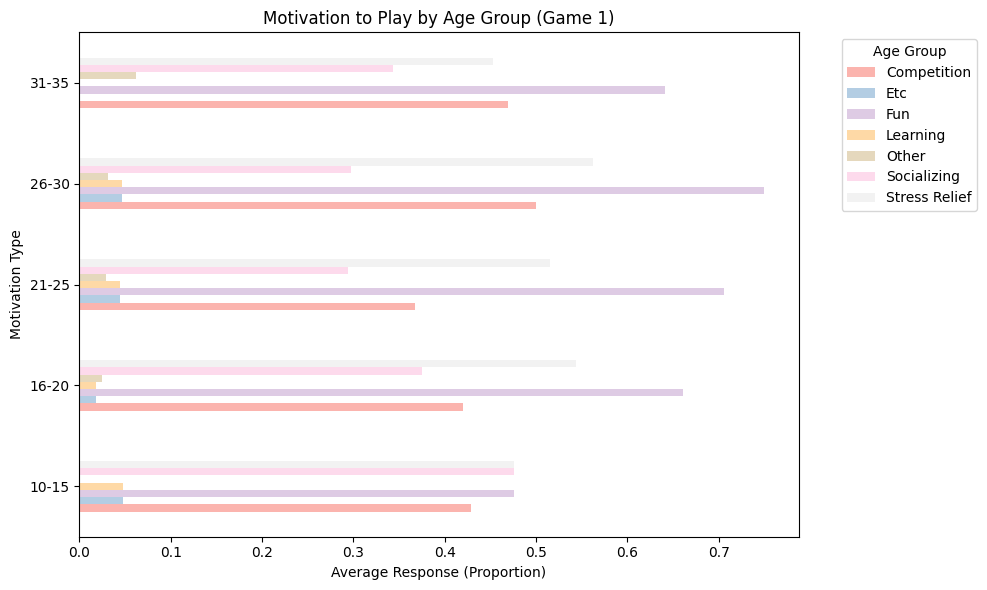

C:\Users\sanlo\AppData\Local\Temp\ipykernel_14928\875903427.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  motivation_by_age2 = df_final.groupby('age_group')[motivation_cols2].mean()


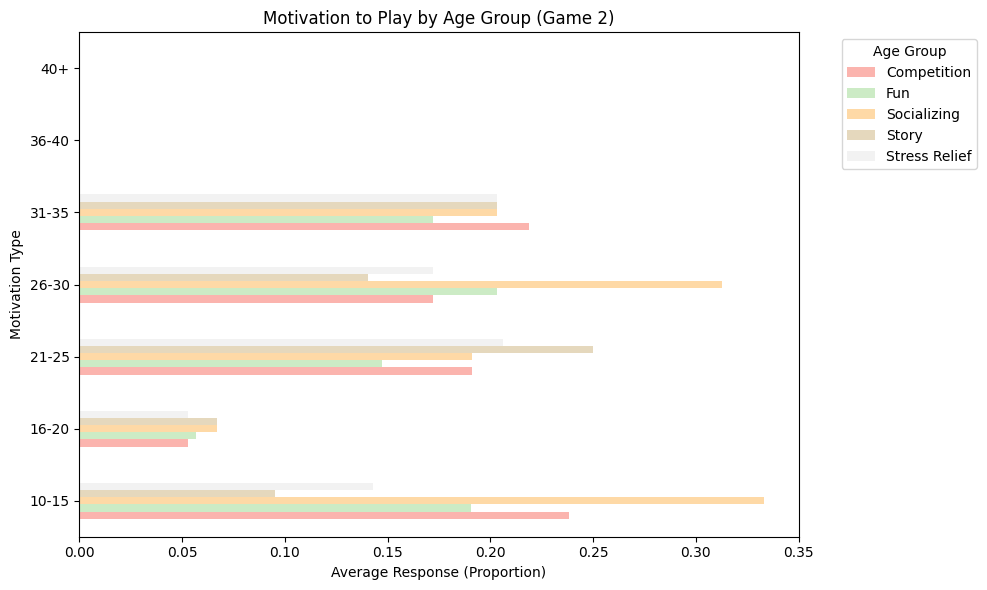

In [316]:
# Juego 1
# Filtrar solo columnas de motivación del juego 1
motivation_cols = df_final.filter(like='motivation1_').columns

# Asegurar que 'age_group' es categoría (por si se ha perdido)
df_final['age_group'] = df_final['age_group'].astype('category')

# Agrupar por grupo de edad y calcular la media de cada motivación
motivation_by_age = df_final.groupby('age_group')[motivation_cols].mean()

# Eliminamos grupos de edad con todos los valores NaN (sin datos)
motivation_by_age = motivation_by_age.dropna(how='all')

# Limpiar nombres de columnas (quitar 'motivation1_')
motivation_by_age.columns = motivation_by_age.columns.str.replace('motivation1_', '')

# Visualización
motivation_by_age.plot(kind='barh', figsize=(10, 6), colormap='Pastel1')
plt.title("Motivation to Play by Age Group (Game 1)")
plt.xlabel("Average Response (Proportion)")
plt.ylabel("Motivation Type")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Juego 2
# Filtrar solo columnas de motivación principal
motivation_cols2 = df_final.filter(like='motivation2_').columns

# Agrupar por grupo de edad y calcular la media de cada motivación
motivation_by_age2 = df_final.groupby('age_group')[motivation_cols2].mean()

# Eliminar el prefijo para que las etiquetas sean más limpias
motivation_by_age2.columns = motivation_by_age2.columns.str.replace('motivation2_', '')

# Visualización
motivation_by_age2.plot(kind='barh', figsize=(10, 6), colormap='Pastel1')
plt.title("Motivation to Play by Age Group (Game 2)")
plt.xlabel("Average Response (Proportion)")
plt.ylabel("Motivation Type")
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



## 🧠 Análisis de Motivaciones según Edad

### 🎮 Game 1 – Motivaciones por Grupo de Edad

- Los grupos **más jóvenes (10–15 y 16–20)** muestran puntuaciones altas en **Stress Relief**, **Fun** y **Socializing**, lo que indica una orientación hacia la evasión y el entretenimiento.
- A partir del grupo **21–25**, se observa un repunte en **Fun** y **Stress Relief**, probablemente por mayor interés en la diversión y la relajación.
- El grupo **25-30** repunta en **Competition**, lo que sugiere una mayor preferencia en superarse a si mismos.
- El grupo **31–35** presenta motivaciones más equilibradas, con valores destacados en **Fun** y **Competition**, lo que sugiere una experiencia más competitiva o social.

🔍 **Interpretación:**
> En Game 1, las motivaciones evolucionan con la edad: los jugadores más jóvenes buscan diversión y desahogo, mientras que los adultos priorizan aspectos sociales o competitivos.

---

### 🎮 Game 2 – Motivaciones por Grupo de Edad

#### 🧒 Grupo 10-15 años
- **Socializing** (≈ 0.34) es la motivación predominante, seguida de cerca por **Competition**.
- También destacan **Stress Relief** y **Fun**, aunque en menor proporción.
- **Story** tiene muy poca relevancia en este grupo.

#### 🧑 Grupo 16-20 años
- Las motivaciones están mucho más niveladas.
- **Socializing**, **Fun** y **Stress Relief** tienen proporciones similares, en torno al 0.06 - 0.08.
- Este grupo muestra menos intensidad en todas las motivaciones comparado con los demás.

#### 👩‍🎓 Grupo 21-25 años
- Mayor equilibrio entre motivaciones, pero **Story** y **Stress Relief** destacan ligeramente.
- Se ve un aumento del interés por el **Storytelling**, lo que puede indicar mayor afinidad por narrativas o juegos inmersivos.

#### 👨‍💼 Grupo 26-30 años
- **Socializing** es la motivación dominante (≈ 0.32), superando al resto.
- **Stress Relief** y **Story** también tienen una presencia significativa.
- Este grupo busca claramente interacción social y desconexión a través del juego.

#### 🧔 Grupo 31-35 años
- **Competition** es la motivación más destacada.
- También se mantiene alta la proporción de **Story** y **Stress Relief**.
- A diferencia del grupo anterior, la **motivación competitiva aumenta con la edad**.

---

### 🔍 **Interpretación:**
A medida que los jugadores envejecen:
- **Socializing** es muy importante en la adolescencia y adultez temprana, pero pierde peso en los mayores de 30.
- **Competition** y **Story** aumentan gradualmente, indicando un cambio hacia retos y narrativa.

---

### 📌 Comparativa general

- **Game 1** muestra una progresión clara: de la evasión al logro social.
- **Game 2** mantiene un atractivo transversal, especialmente para quienes valoran historias y experiencias más relajadas.
- En ambos juegos, **Stress Relief** y **Fun** son claves para los más jóvenes, mientras que **Competition** y **Socializing** crecen con la edad.



## 2.5. Dispositivo más usado por género

In [317]:
# Dispositivos juego nº1
df_final.filter(like='device1_').sum().sort_values(ascending=False)


device1_Mobile     340
device1_PC         194
device1_Console    184
dtype: int64

In [318]:
# Dispositivos juego nº2
df_final.filter(like='device2_').sum().sort_values(ascending=False)

device2_Mobile     177
device2_Console    176
device2_PC         167
dtype: int64

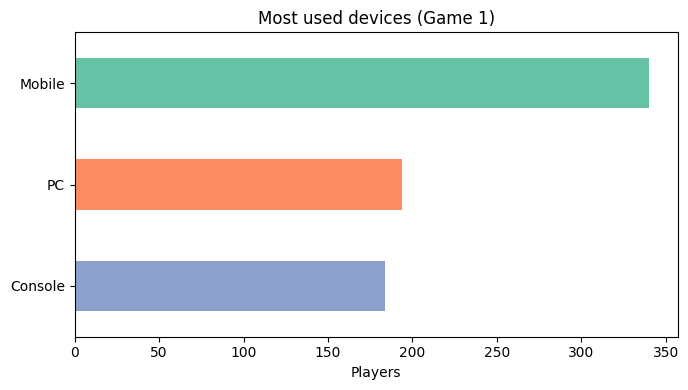

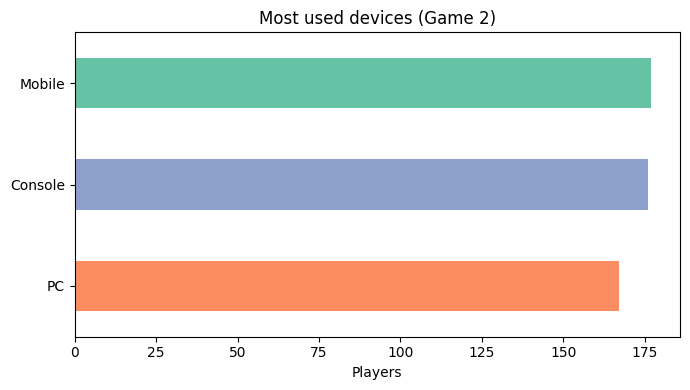

In [319]:
color_dispositivos = {
    'Mobile': '#66c2a5',
    'PC': '#fc8d62',
    'Console': '#8da0cb'
}

# Game 1
data = df_final.filter(like='device1_').sum()
data.index = data.index.str.replace('device1_', '')
data = data.sort_values()
colors_devices = [color_dispositivos[device] for device in data.index]

data.plot(kind='barh', figsize=(7, 4), color=colors_devices)
plt.title('Most used devices (Game 1)')
plt.xlabel('Players')
plt.tight_layout()
plt.show()

# Game 2
data = df_final.filter(like='device2_').sum()
data.index = data.index.str.replace('device2_', '')
data = data.sort_values()
colors_devices = [color_dispositivos[device] for device in data.index] 

data.plot(kind='barh', figsize=(7, 4), color=colors_devices)
plt.title('Most used devices (Game 2)')
plt.xlabel('Players')
plt.tight_layout()
plt.show()


### 🧠 Conclusiones clave – Dispositivos usados por juego

- El **móvil** es el dispositivo más usado en ambos juegos, pero especialmente **dominante en el juego nº1**.

- En el **juego nº2** sigue en cabeza, pero la diferencia con **PC y consola** es mucho menor.  
  **Mobile**, **Console** y **PC** están prácticamente igualados.  
  Esto puede sugerir que este juego se **adapta mejor a otros dispositivos**, o que los jugadores que lo prueban **no tienen preferencia fuerte de plataforma**.

---

#### 🎮 La consola gana protagonismo en el juego nº2:
- Mientras que en el **juego nº1** es el **menos usado**, en el nº2 **alcanza niveles similares al móvil**.
- Esto podría indicar un **cambio en el diseño o accesibilidad** del juego para consola.

---

### 🔍 Posibles interpretaciones:
- El **juego nº1** puede estar **optimizado o pensado para móviles**, lo que justificaría la diferencia.
- El **juego nº2** podría ser **multiplataforma** o más reciente, con una estrategia más homogénea en dispositivos.
- Otra opción es que los jugadores **experimenten el juego nº2 en plataformas distintas a la habitual**, al no estar tan fidelizados.


In [320]:
# Géneros juego nº1
df_final.filter(like='genre1_').sum().sort_values(ascending=False)

genre1_Action-Adventure        298
genre1_First-Person Shooter    238
genre1_MMO                     153
genre1_Role-Playing            153
genre1_Puzzle-Strategy         130
genre1_Sports                  108
genre1_Simulation               86
dtype: int64

In [321]:
# Géneros juego nº2
df_final.filter(like='genre2_').sum().sort_values(ascending=False)

genre2_Action-Adventure        42
genre2_Simulation              42
genre2_Puzzle-Strategy         41
genre2_First-Person Shooter    40
genre2_Role-Playing            36
genre2_Horror                  35
genre2_Sports                  34
genre2_Casual                  30
dtype: int64

In [322]:
color_generos = {
    'Action-Adventure': '#66c2a5',
    'First-Person Shooter': '#fc8d62',
    'Role-Playing': '#8da0cb',
    'MMO': '#e78ac3',
    'Puzzle-Strategy': '#a6d854',
    'Sports': '#ffd92f',
    'Simulation': '#e5c494',
    'Horror': '#cab2d6',
    'Casual': '#fdbf6f'
}

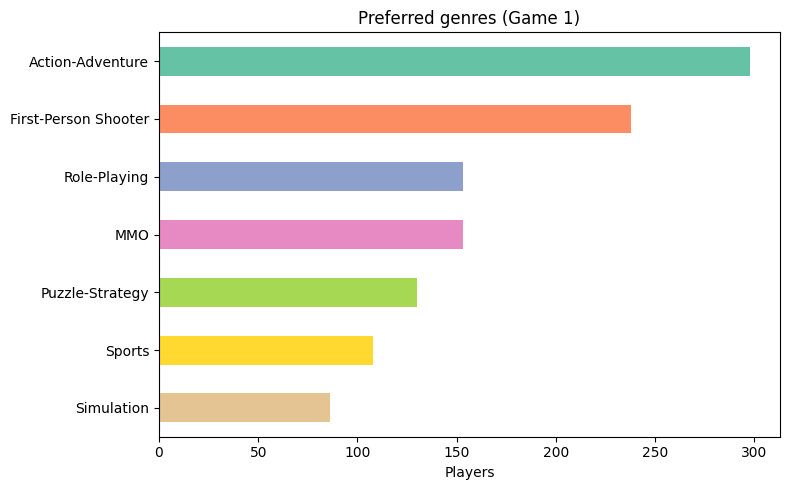

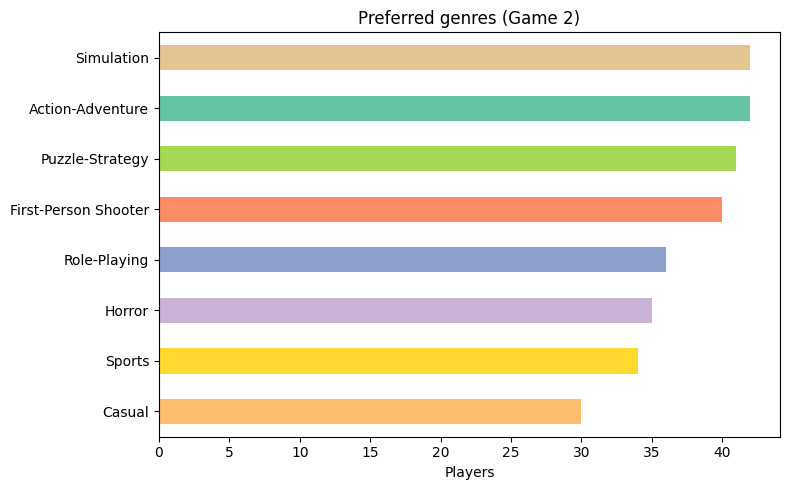

In [323]:
# Game 1
data = df_final.filter(like='genre1_').sum()
data.index = data.index.str.replace('genre1_', '', regex=False)
data = data.sort_values()

colors_genres = [color_generos[genre] for genre in data.index]

data.plot(kind='barh', figsize=(8, 5), color=colors_genres)
plt.title('Preferred genres (Game 1)')
plt.xlabel('Players')
plt.tight_layout()
plt.show()

# Game 2
data = df_final.filter(like='genre2_').sum()
data.index = data.index.str.replace('genre2_', '', regex=False)
data = data.sort_values()

colors_genres = [color_generos[genre] for genre in data.index]

data.plot(kind='barh', figsize=(8, 5), color=colors_genres)
plt.title('Preferred genres (Game 2)')
plt.xlabel('Players')
plt.tight_layout()
plt.show()

### 🎮 Conclusiones clave – Géneros favoritos por juego

1. **El juego nº1 muestra una preferencia clara por los géneros competitivos y de acción:**
   - *Action-Adventure* y *First-Person Shooter* dominan con diferencia.
   - Esto sugiere un perfil de jugador más competitivo o que busca dinamismo y desafío.

2. **El juego nº2 muestra una preferencia más distribuida y variada:**
   - Los géneros están mucho más equilibrados, sin uno que destaque de forma extrema.
   - *Simulation*, *Puzzle-Strategy*, *Action-Adventure* y *First-Person Shooter* están casi igualados.

3. **Géneros presentes solo en el juego nº2:**
   - *Horror* y *Casual* aparecen únicamente en el juego nº2.
   - Esto podría deberse a que incluye experiencias más recientes, más casuales o adaptadas a públicos nuevos.

4. **Interpretación global:**
   - **Juego nº1** parece atraer a jugadores más veteranos o intensivos (*acción*, *shooter*).
   - **Juego nº2** parece orientado a explorar más tipos de jugadores: *casuales*, *curiosos* o interesados en géneros menos exigentes.


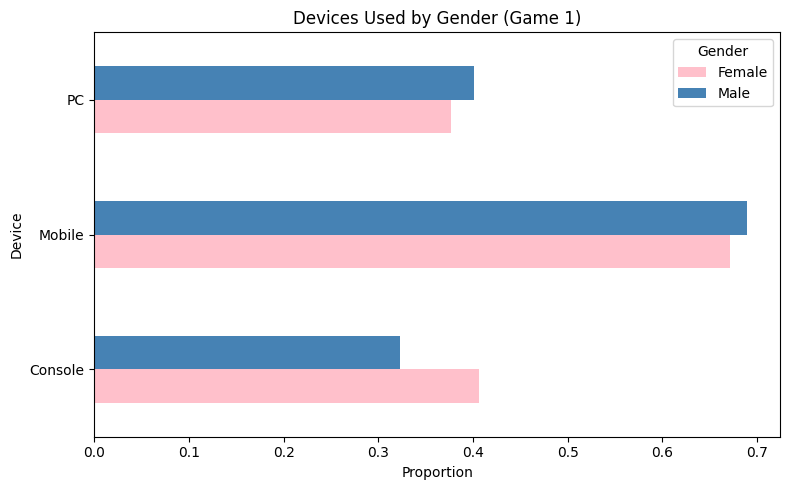

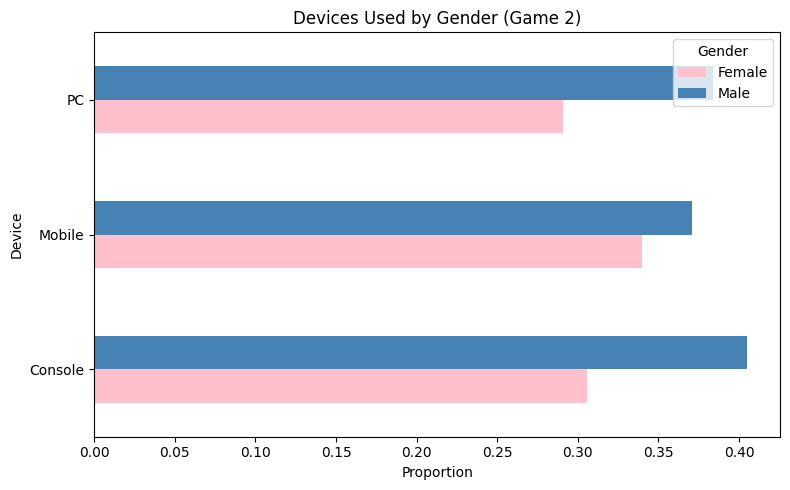

In [324]:
# Dispositivo más usado por género (Juego 1)
device01 = df_final.filter(like="device1_").copy()
device01["gender"] = df_final["gender"]

device01_grouped = device01.groupby("gender").mean().T
device01_grouped.index = device01_grouped.index.str.replace("device1_", "")

# Asegúrate de que el orden de columnas es ['Female', 'Male']
device01_grouped = device01_grouped[["Female", "Male"]]

# Gráfico
device01_grouped.plot(kind='barh', figsize=(8, 5), color=["pink", "steelblue"])
plt.title("Devices Used by Gender (Game 1)")
plt.xlabel("Proportion")
plt.ylabel("Device")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


# Dispositivo más usado por género (Juego 2)
device02 = df_final.filter(like="device2_").copy()
device02["gender"] = df_final["gender"]

device02_grouped = device02.groupby("gender").mean().T
device02_grouped.index = device02_grouped.index.str.replace("device2_", "")
device02_grouped = device02_grouped[["Female", "Male"]]

# Gráfico
device02_grouped.plot(kind='barh', figsize=(8, 5), color=["pink", "steelblue"])
plt.title("Devices Used by Gender (Game 2)")
plt.xlabel("Proportion")
plt.ylabel("Device")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


## 🎮 Dispositivo preferido por género – Comparativa

### 🔹 Game 1 – Device Used by Gender

- **Mobile**: Es el dispositivo más popular tanto para mujeres como para hombres, aunque su uso es más alto entre los hombres.
- **Console**: Tiene mayor proporción de uso en mujeres
- **PC**: También muestra una ligera preferencia masculina, pero con diferencia moderada respecto a mujeres.

🔍 **Interpretación:**
> En Game 1, se observa una mayor afinidad del género femenino hacia el uso de **Console**, mientras que los hombres utilizan de forma más equilibrada los tres dispositivos, con una ligera inclinación hacia **PC** y **Mobile**.

---

### 🔹 Game 2 – Device Used by Gender

- **PC**: Preferencia más marcada de los hombres sobre las mujeres, que queda relegado al tercer puesto. 
- **Mobile**: Tiene una presencia significativa en ambos géneros, aunque algo más elevada en mujeres.
- **Console**: Es el dispositivo más popular entre los hombres, y el segundo más usado entre las mujeres. 

🔍 **Interpretación:**
> En Game 2, **Console** se consolida como el dispositivo predominante para los hombres. El **Mobile** sigue siendo relevante en mujeres, mostrando una tendencia más casual o de accesibilidad. 


## 2.6. Géneros de videojuego preferidos por género

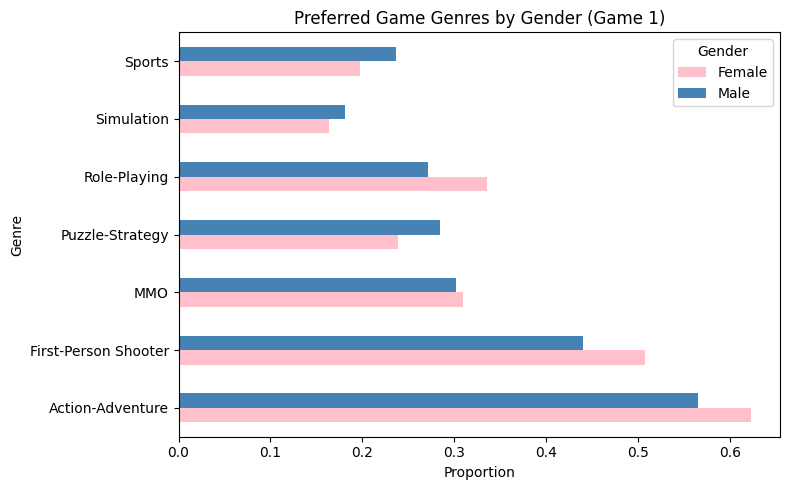

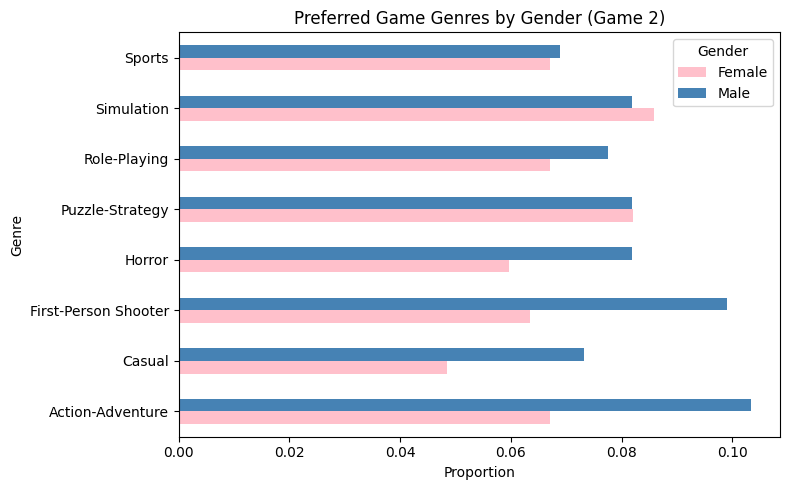

In [325]:
# Game 1 - Géneros preferidos por género
genre1 = df_final.filter(like="genre1_").copy()
genre1["gender"] = df_final["gender"]

# Agrupamos por género y calculamos proporciones
genre1_grouped = genre1.groupby("gender").mean().T
genre1_grouped.index = genre1_grouped.index.str.replace("genre1_", "")
genre1_grouped = genre1_grouped[["Female", "Male"]]  # Asegura el orden

# Gráfico
genre1_grouped.plot(
    kind="barh",
    figsize=(8, 5),
    color=["pink", "steelblue"]
)

plt.title("Preferred Game Genres by Gender (Game 1)")
plt.xlabel("Proportion")
plt.ylabel("Genre")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# Game 2 - Géneros preferidos por género
genre2 = df_final.filter(like="genre2_").copy()
genre2["gender"] = df_final["gender"]

# Agrupamos por género y calculamos proporciones
genre2_grouped = genre2.groupby("gender").mean().T
genre2_grouped.index = genre2_grouped.index.str.replace("genre2_", "")
genre2_grouped = genre2_grouped[["Female", "Male"]]  # Asegura el orden

# Gráfico
genre2_grouped.plot(
    kind="barh",
    figsize=(8, 5),
    color=["pink", "steelblue"]
)

plt.title("Preferred Game Genres by Gender (Game 2)")
plt.xlabel("Proportion")
plt.ylabel("Genre")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


## 🎮 Preferencias de géneros de videojuegos por género

### 📊 Game 1 – Preferred Game Genres by Gender

#### 👩 Mujeres
- **Action-Adventure** es el género más popular entre las jugadoras, con una proporción superior al 60%, siendo el más destacado de toda la gráfica.
- También muestran una gran afinidad por los juegos de **First-Person Shooter (FPS)**, superando incluso a los hombres.
- Gozan de una mayor inclinación hacia el **Role-Playing** que los hombres.
- En cambio, los géneros como **Sports** y **Simulation** son menos populares entre ellas.

#### 👨 Hombres
- Aunque también prefieren en primer lugar **Action-Adventure**, lo hacen en menor medida que las mujeres.
- Tienen una preferencia más elevada por los juegos de **Sports**, **Puzzle-Strategy**, **MMO** y **Simulation** en comparación con las mujeres.
- En **FPS**, aunque también es una opción destacada, su proporción es ligeramente inferior a la femenina.
- Tienen una menor inclinación por los juegos de **Role-Playing** que las jugadoras.

🔎 **Interpretación:**
> Las **jugadoras** tienden a inclinarse hacia géneros con fuerte narrativa e inmersión, como **Action-Adventure** y **Role-Playing**, y también hacia experiencias intensas como los **FPS**. Los **jugadores** muestran una mayor diversidad en sus gustos, con valores más repartidos, y destacan en géneros como **Sports**, **Simulation** y **Puzzle-Strategy**.

---

### 📊 Game 2 – Preferred Game Genres by Gender

#### 👩 Mujeres
- Las preferencias están más marcadas que en Game 1.
- **Simulation** y **Puzzle-Strategy** destacan como los géneros con mayor proporción femenina.
- También se observan intereses notables en **Role-Playing**, **Horror** y **Action-Adventure**.
- El género **Casual** es exclusivo de este segundo conjunto.

#### 👨 Hombres
- La preferencia masculina también está distribuida, pero con mayor inclinación hacia:
  - **First-Person Shooter (FPS)** y **Action-Adventure**, ambos con una proporción destacada.
  - **Horror** muestra mayor preferencia entre los hombres que entre las mujeres, así como **Role-Playing** y **Sports**.
  - En **Casual**, los hombres superan a las mujeres.

---

### 📌 Conclusión general

En Game 2, las preferencias están más marcadas, sin un género claramente dominante. Los **jugadores** se inclinan más por géneros de acción e intensidad como **FPS** y **Action-Adventura**, mientras que las **jugadoras** optan por géneros como **Simulation**, **Puzzle-Strategy** y **Role-Playing**, manteniendo un perfil más equilibrado.


## 2.7. Comparativa dispositivos por rango de edad

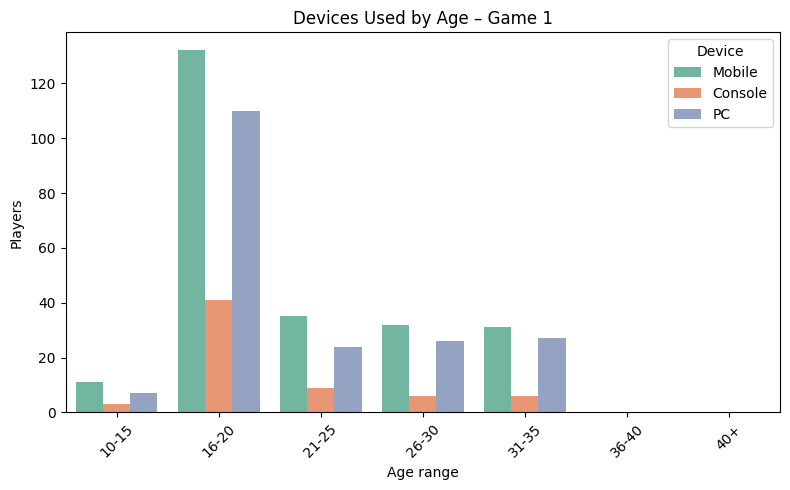

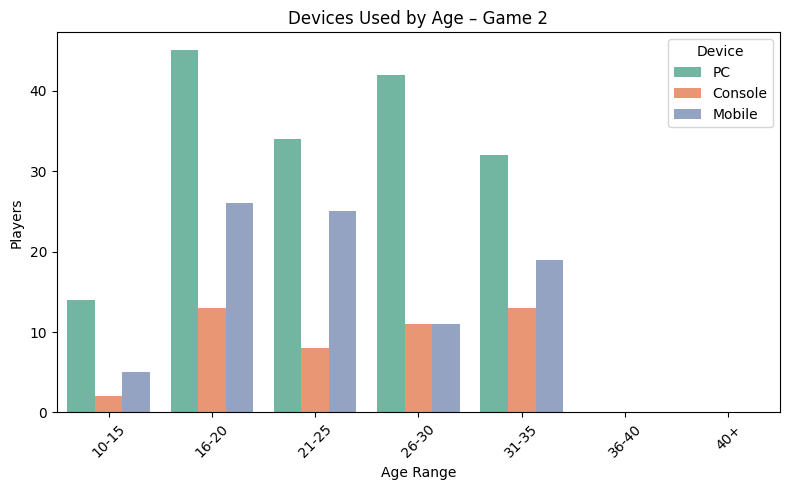

In [326]:
# Game 1
# Crear copia segura
df_game1 = df_final.copy()

# Crear columna con dispositivo principal
def get_device_game1(row):
    if row['device1_PC'] == 1:
        return 'PC'
    elif row['device1_Mobile'] == 1:
        return 'Mobile'
    elif row['device1_Console'] == 1:
        return 'Console'

df_game1['device_main'] = df_game1.apply(get_device_game1, axis=1)

# Gráfica
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_game1,
    x='age_group',
    hue='device_main',
    palette='Set2'
)
plt.title("Devices Used by Age – Game 1")
plt.xlabel("Age range")
plt.ylabel("Players")
plt.xticks(rotation=45)
plt.legend(title="Device")
plt.tight_layout()
plt.show()

# Game 2
# Crear copia segura
df_game2 = df_final.copy()

# Crear columna con dispositivo principal
def get_device_game2(row):
    if row['device2_PC'] == 1:
        return 'PC'
    elif row['device2_Mobile'] == 1:
        return 'Mobile'
    elif row['device2_Console'] == 1:
        return 'Console'

df_game2['device_main'] = df_game2.apply(get_device_game2, axis=1)

# Gráfica
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_game2,
    x='age_group',
    hue='device_main',
    palette='Set2'
)
plt.title("Devices Used by Age – Game 2")
plt.xlabel("Age Range")
plt.ylabel("Players")
plt.xticks(rotation=45)
plt.legend(title="Device")
plt.tight_layout()
plt.show()



## 📊 Uso de dispositivos por grupo de edad – Análisis comparativo

### 🎮 Game 1 – Devices Used by Age

- **Mobile**: Es el dispositivo más utilizado entre los grupos de edad más jóvenes, especialmente el grupo **16–20**, que muestra una clara preferencia.
- **PC**: También tiene una presencia destacada en el grupo **16–20**, lo que indica que es una plataforma clave para adolescentes y jóvenes adultos.
- **Console**: Su uso es mucho menor en general, aunque tiene cierta presencia en el grupo **16–20**.

🔍 **Interpretación:**
> En Game 1, los dispositivos Mobile dominan entre los usuarios más jóvenes, seguidos de cerca por el PC. Las Consoles son usadas por una minoría, posiblemente en géneros específicos o por preferencia personal.

---

### 🎮 Game 2 – Devices Used by Age

- **PC**: Es el dispositivo dominante en todos los grupos de edad, con especial fuerza entre los grupos de **16–20** y **26–30**.
- **Mobile**: Muestra un uso equilibrado entre los distintos rangos, aunque con menor protagonismo que en Game 1.
- **Console**: Se mantiene con una presencia baja pero constante, ligeramente mayor en usuarios más jóvenes.

🔍 **Interpretación:**
> En Game 2, se observa una mayor dependencia del PC como plataforma principal en todos los grupos de edad. El Mobile tiene un rol más complementario, mientras que el uso de Consoles es limitado.



## 2.8. Juegos favoritos

In [327]:
# Juegos favoritos elección nº1
df_final.filter(like='favorite_game1_').sum().sort_values(ascending=False)

favorite_game1_Call Of Duty             91
favorite_game1_Wuthering Waves          66
favorite_game1_Solo Leveling            45
favorite_game1_Efootball                43
favorite_game1_Bgmi                     42
favorite_game1_Chess                    40
favorite_game1_FC Mobile                23
favorite_game1_Subway                   23
favorite_game1_Wukong                   23
favorite_game1_Free Fire                22
favorite_game1_MOBA Legends             22
favorite_game1_Rhythm Rush Lite         22
favorite_game1_Fortnite                 20
favorite_game1_Clash Of Clans           20
favorite_game1_Many                     20
favorite_game1_Red Dead Redemption 2    20
favorite_game1_God Of War Ragnarok      20
dtype: int64

In [328]:
# Juegos favoritos elección nº2
df_final.filter(like='favorite_game2_').sum().sort_values(ascending=False)

favorite_game2_Fifa 2024            42
favorite_game2_Call Of Duty         39
favorite_game2_Overwatch            35
favorite_game2_League Of Legends    31
favorite_game2_Minecraft            29
favorite_game2_Apex Legends         27
favorite_game2_Genshin Impact       27
favorite_game2_Fortnite             26
favorite_game2_Among Us             22
favorite_game2_Valorant             22
dtype: int64

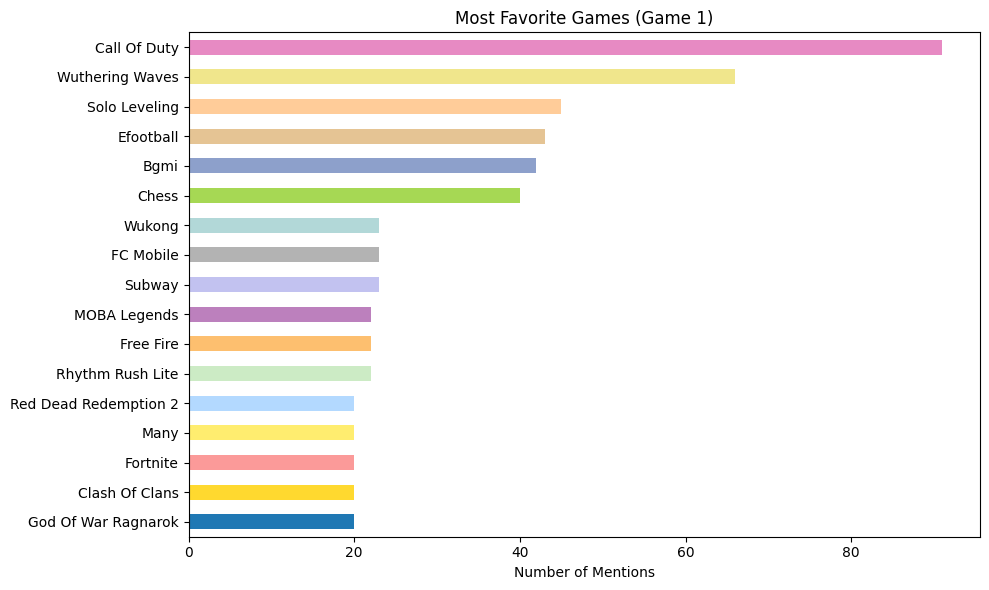

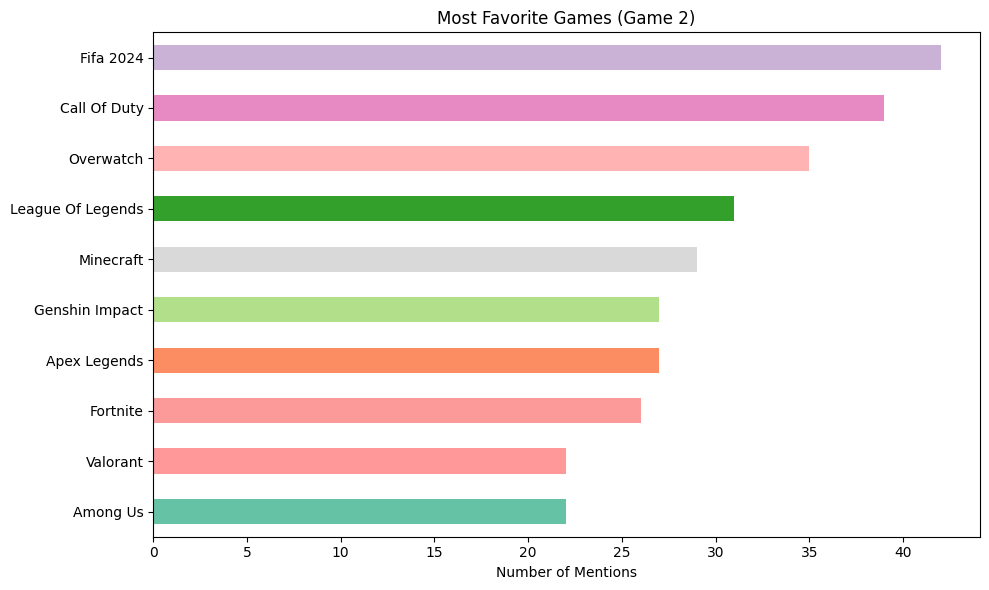

In [329]:
# Paso 1: Extraer datos agregados por juego
data1 = df_final.filter(like='favorite_game1_').sum()
data2 = df_final.filter(like='favorite_game2_').sum()

# Paso 2: Limpiar nombres de columnas
data1.index = data1.index.str.replace('favorite_game1_', '', regex=False)
data2.index = data2.index.str.replace('favorite_game2_', '', regex=False)

# Paso 3: Orden descendente
data1 = data1.sort_values(ascending=True)
data2 = data2.sort_values(ascending=True)

# Paso 4: Crear paleta de colores coherente para todos los juegos combinados
todos_los_juegos = sorted(set(data1.index) | set(data2.index))

paleta = [
    '#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854',
    '#ffd92f', '#e5c494', '#b3b3b3', '#cab2d6', '#fb9a99',
    '#fdbf6f', '#b2df8a', '#1f78b4', '#33a02c', '#bc80bd',
    '#ffed6f', '#d9d9d9', '#ffb3b3', '#b3d9ff', '#ccebc5',
    '#ffcc99', '#c2c2f0', '#ff9999', '#b2d8d8', '#f0e68c'
][:len(todos_los_juegos)]

colores_dict = dict(zip(todos_los_juegos, paleta))

# Paso 5: Generar listas de colores para cada gráfico
colores1 = [colores_dict[juego] for juego in data1.index]
colores2 = [colores_dict[juego] for juego in data2.index]

# Paso 6: Plot Game 1
data1.plot(kind='barh', figsize=(10, 6), color=colores1)
plt.title('Most Favorite Games (Game 1)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()

# Paso 7: Plot Game 2
data2.plot(kind='barh', figsize=(10, 6), color=colores2)
plt.title('Most Favorite Games (Game 2)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()



## 🧠 Conclusiones clave – Juegos favoritos

### 🎮 Juego 1
- **Call of Duty** es el claro favorito, con diferencia significativa sobre el resto.
- Le siguen **Wuthering Waves**, **Solo Leveling**, **Efootball**, y **Bgmi**.
- La lista es larga y diversa, incluyendo tanto juegos populares como otros más de nicho (Chess, Wukong, Subway...).
- Esto indica una mayor variedad de preferencias y una base de jugadores más amplia y comprometida.

### 🎮 Juego 2
- El top 5 lo forman **Fifa 2024**, **Call of Duty**, **Overwatch**, **League of Legends** y **Minecraft**.
- Aunque hay menos menciones totales, también muestra variedad con juegos muy conocidos.
- Aparecen títulos orientados al juego en línea o competitivo (Valorant, Apex Legends, LoL, etc.).

### 📌 Comparativa general
- **Call of Duty** destaca como único juego en el top de ambos, con alta fidelidad.
- **Juego 1** tiene una mayor cantidad y variedad de menciones, lo que puede reflejar más engagement o antigüedad.
- **Juego 2** muestra preferencias algo más concentradas y ligadas a títulos populares de eSports.

> El tipo de juegos mencionados también puede sugerir diferencias en el perfil de los jugadores: más casual y variado en el Juego 1, más competitivo y social en el Juego 2.


## 2.9. Modo de juego favorito

In [330]:
# 10. Modo de juego nº1
df_final.filter(like='game_mode1_').sum().sort_values(ascending=False)

game_mode1_Both             263
game_mode1_Multiplayer      155
game_mode1_Single-player     82
dtype: int64

In [331]:
# Modo de juego nº2
df_final.filter(like='game_mode2_').sum().sort_values(ascending=False)

game_mode2_Single-player    107
game_mode2_Multiplayer      103
game_mode2_Both              90
dtype: int64

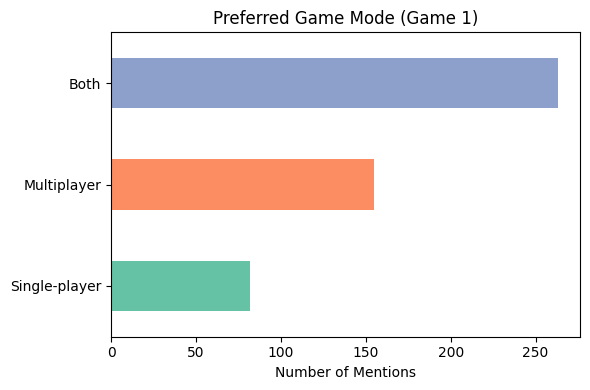

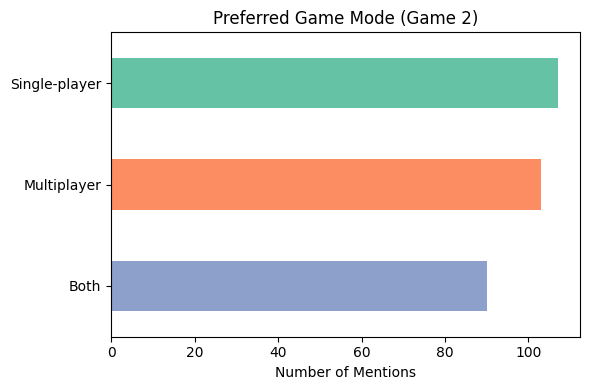

In [332]:
# Diccionario de colores fijos para los modos
colores_modos = {
    'Single-player': '#66c2a5',  
    'Multiplayer': '#fc8d62',  
    'Both': '#8da0cb'           
}

# GAME 1
data1 = df_final.filter(like='game_mode1_').sum()
data1.index = data1.index.str.replace('game_mode1_', '')
data1 = data1.sort_values()
colores1 = [colores_modos[modo] for modo in data1.index]

data1.plot(kind='barh', figsize=(6, 4), color=colores1)
plt.title('Preferred Game Mode (Game 1)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()

# GAME 2
data2 = df_final.filter(like='game_mode2_').sum()
data2.index = data2.index.str.replace('game_mode2_', '')
data2 = data2.sort_values()
colores2 = [colores_modos[modo] for modo in data2.index]

data2.plot(kind='barh', figsize=(6, 4), color=colores2)
plt.title('Preferred Game Mode (Game 2)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()



## 🎮 Conclusiones clave – Modos de juego preferidos

### 🔹 Game 1:
- El modo más popular es **"Both"** (jugadores que prefieren tanto single-player como multiplayer).
- **Multiplayer** ocupa la segunda posición con bastante diferencia.
- **Single-player** es el menos frecuente, aunque con una presencia notable.

### 🔹 Game 2:
- La distribución está más equilibrada entre las tres categorías.
- **Multiplayer** y **Single-player** tienen una participación muy similar.
- **Both** es menos frecuente, aunque sigue siendo relevante.

### 🧠 Interpretaciones posibles:
- **Game 1** parece ofrecer una experiencia más completa o versátil, lo que podría justificar la preferencia por “Both”.
- En **Game 2**, los jugadores tienen preferencias más divididas, lo que sugiere que el juego puede tener modos más diferenciados o menos integrados.
- El menor uso de "Both" en Game 2 podría deberse a limitaciones técnicas o a una experiencia de usuario que obliga a elegir entre una u otra modalidad.

### 📌 Conclusión general:
- **Game 1** refleja un tipo de jugador más abierto a distintos modos de juego.
- **Game 2** muestra un perfil de usuario más segmentado entre los que prefieren jugar solos o en compañía.

## 2.10. Fuentes de descubrimiento

In [333]:
# Descubrimiento juego nº1
df_final.filter(like='discovery1_').sum().sort_values(ascending=False)

discovery1_Social Media       263
discovery1_Gaming Forums      198
discovery1_Recommendations    167
discovery1_Twitch             128
discovery1_YouTube            128
discovery1_ReviewsBlogs       107
discovery1_Other               40
dtype: int64

In [334]:
# Descubrimiento juego nº2
df_final.filter(like='discovery2_').sum().sort_values(ascending=False)

discovery2_YouTube            69
discovery2_Social Media       67
discovery2_Twitch             60
discovery2_Gaming Forums      55
discovery2_Recommendations    49
discovery2_ReviewsBlogs        0
dtype: int64

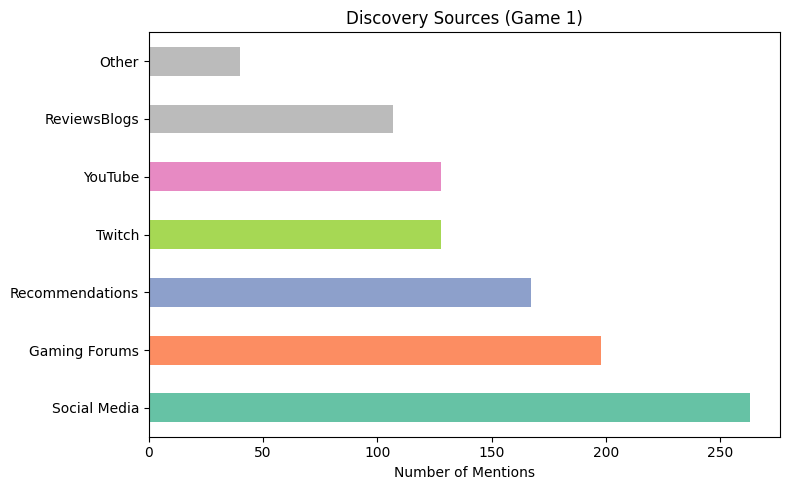

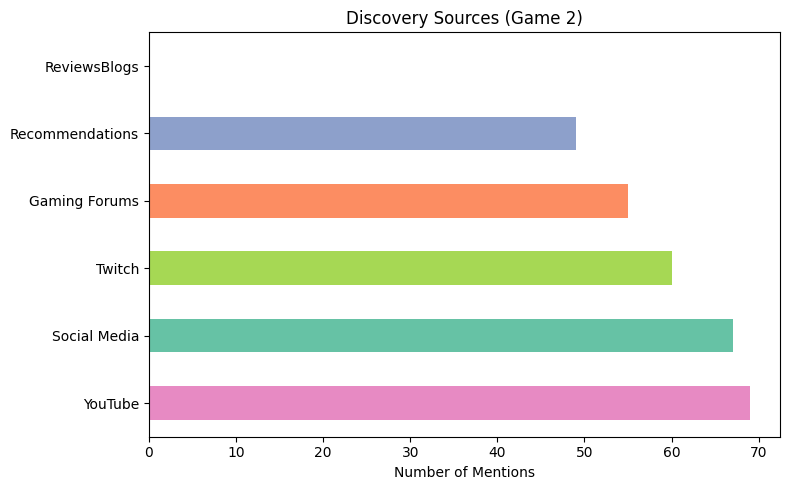

In [335]:
colores_fuentes = {
    'Social Media': '#66c2a5',
    'Gaming Forums': '#fc8d62',
    'Recommendations': '#8da0cb',
    'YouTube': '#e78ac3',
    'Twitch': '#a6d854',
    'Reviews/Blogs': '#ffd92f',
}

# GAME 1 - Discovery Sources
data1 = df_final.filter(like='discovery1_').sum()
data1.index = data1.index.str.replace('discovery1_', '')
data1 = data1.sort_values(ascending=False)

colores1 = [colores_fuentes.get(source, '#bbbbbb') for source in data1.index]

data1.plot(kind='barh', figsize=(8, 5), color=colores1)
plt.title('Discovery Sources (Game 1)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()

# GAME 2 - Discovery Sources
data2 = df_final.filter(like='discovery2_').sum()
data2.index = data2.index.str.replace('discovery2_', '')
data2 = data2.sort_values(ascending=False)

colores2 = [colores_fuentes.get(source, '#bbbbbb') for source in data2.index]

data2.plot(kind='barh', figsize=(8, 5), color=colores2)
plt.title('Discovery Sources (Game 2)')
plt.xlabel('Number of Mentions')
plt.tight_layout()
plt.show()


## 📌 Conclusiones clave – Discovery Sources (Fuentes de descubrimiento)

### 🎮 Game 1:
- **Social Media** es la fuente más mencionada con diferencia, seguida por **Gaming Forums** y **Recommendations**.
- Plataformas como **YouTube** y **Twitch** también aparecen, pero con menor peso.
- Se observa incluso una categoría **Other**, aunque con muy poca relevancia.

🔹 **Interpretación:**
- El descubrimiento del Juego 1 parece venir mayoritariamente de canales sociales y comunidades online.
- Este patrón es común en juegos con fuerte presencia en redes y foros especializados.
- YouTube y Twitch, aunque relevantes, están en un segundo plano, lo que sugiere que el marketing del juego se basa más en contenido compartido o recomendaciones directas.

---

### 🎮 Game 2:
- También domina **Social Media**, seguida muy de cerca por **YouTube**, **Twitch** y **Gaming Forums**.
- A diferencia del Juego 1, las fuentes están mucho más equilibradas entre sí.

🔹 **Interpretación:**
- Juego 2 parece tener una estrategia de descubrimiento más repartida entre plataformas visuales (YouTube/Twitch) y redes sociales.
- Esto podría deberse a una campaña más reciente o diversificada, donde los jugadores han accedido al juego desde distintos entornos online.
- La ausencia de la categoría **Other** puede deberse a una estructura más acotada o una mejor categorización de respuestas.

---

### 🧠 Conclusión general:
- Ambos juegos se descubren principalmente en redes sociales, pero **Game 1** tiene una concentración más alta en pocas fuentes.
- **Game 2**, en cambio, muestra una distribución más equilibrada entre redes sociales, vídeo y foros.
- Esto puede indicar diferencias en el público objetivo, antigüedad del juego, o tipo de campaña promocional.


## 🎯 3. Perfil general del jugador que más horas dedica

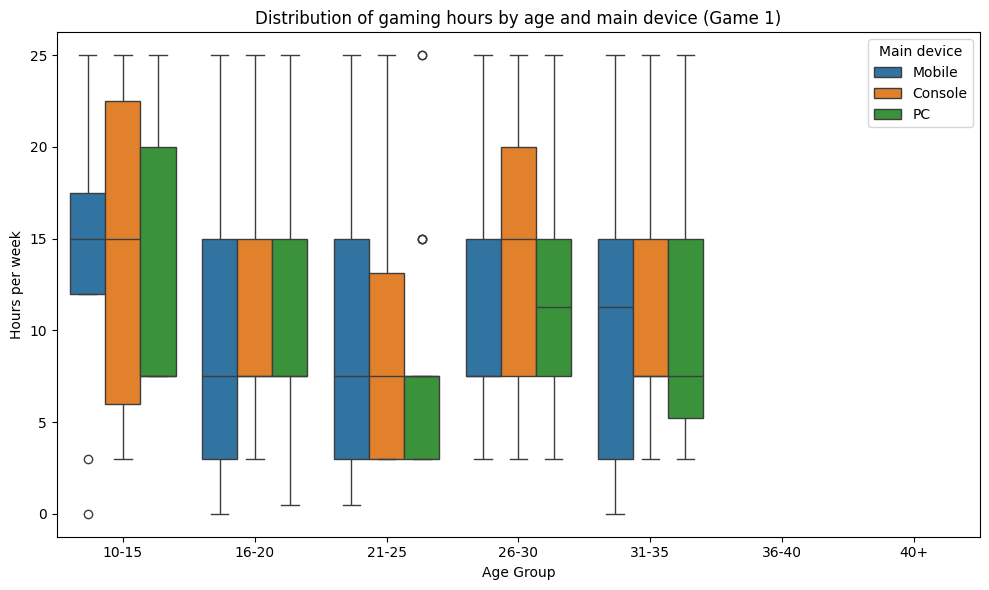

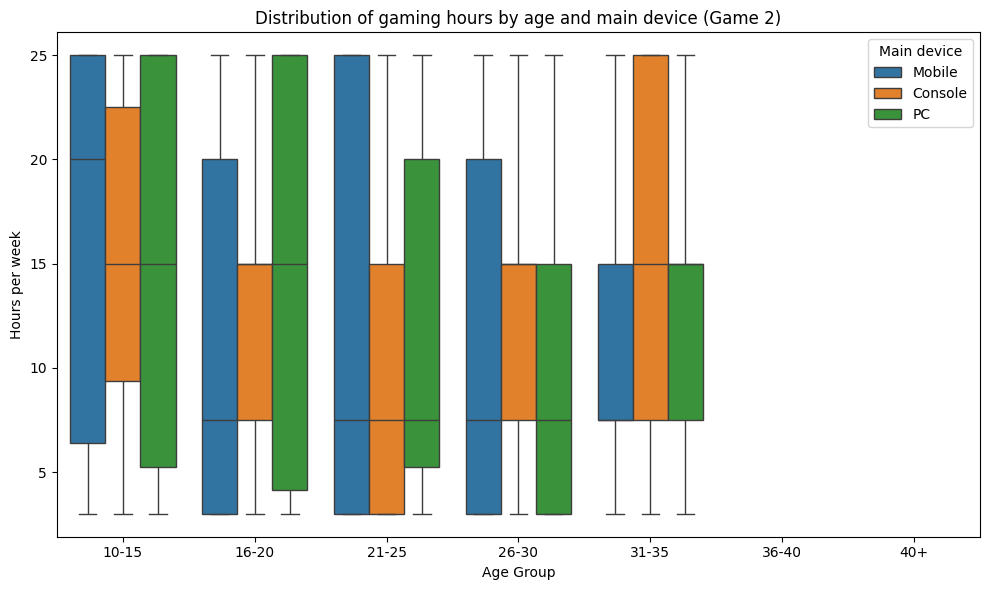

In [336]:
# Crear columna de dispositivo principal (PC / Console / Mobile)
df_final["device"] = df_final[["device1_PC", "device1_Console", "device1_Mobile"]].idxmax(axis=1)
df_final["device"] = df_final["device"].str.replace("device1_", "")


# Convertir categorías de horas a valores numéricos estimados
horas_map = {
    "Less than 1 hour": 0.5,
    "0 hours": 0,
    "1–5 hours": 3,
    "5–10 hours": 7.5,
    "10–20 hours": 15,
    "More than 20 hours": 25
}

# Game 1
df_final["hours_per_week_1_num"] = df_final["hours_per_week_1"].map(horas_map)

# Eliminar filas sin datos numéricos de horas o edad
df_box = df_final.dropna(subset=["hours_per_week_1_num", "age_group", "device"])

# Graficar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_box, x="age_group", y="hours_per_week_1_num", hue="device")
plt.title("Distribution of gaming hours by age and main device (Game 1)")
plt.xlabel("Age Group")
plt.ylabel("Hours per week")
plt.legend(title="Main device", loc="upper right")
plt.tight_layout()
plt.show()

# Game 2

df_final["hours_per_week_2_num"] = df_final["hours_per_week_2"].map(horas_map)

# Eliminar filas sin datos numéricos de horas o edad
df_box = df_final.dropna(subset=["hours_per_week_2_num", "age_group", "device"])

# Graficar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_box, x="age_group", y="hours_per_week_2_num", hue="device")
plt.title("Distribution of gaming hours by age and main device (Game 2)")
plt.xlabel("Age Group")
plt.ylabel("Hours per week")
plt.legend(title="Main device", loc="upper right")
plt.tight_layout()
plt.show()



In [337]:
# Horas activas según género
# Game 1
df_final["horas_numericas"] = df_final["hours_per_week_1"].map(horas_map)

# Agrupar por género y calcular la media de horas
media_por_genero = df_final.groupby("gender")["horas_numericas"].mean().sort_values(ascending=False)

print(media_por_genero)

# Game 2
# Horas activas según género
df_final["horas_numericas_2"] = df_final["hours_per_week_2"].map(horas_map)

# Agrupar por género y calcular la media de horas
media_por_genero_2 = df_final.groupby("gender")["horas_numericas_2"].mean().sort_values(ascending=False)

print(media_por_genero_2)


gender
Female    11.248134
Male      11.021552
Name: horas_numericas, dtype: float64
gender
Female    12.824138
Male      12.487097
Name: horas_numericas_2, dtype: float64


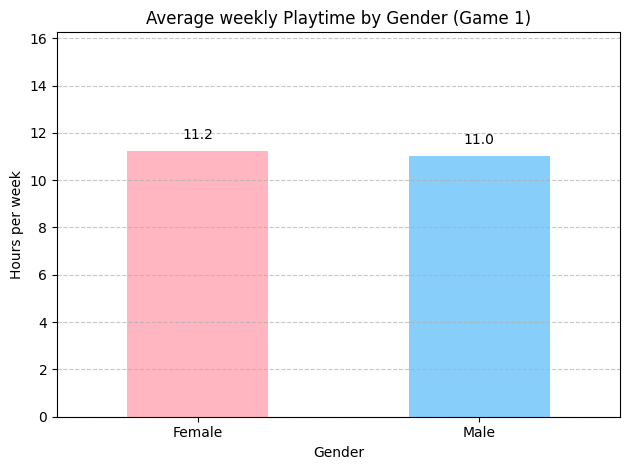

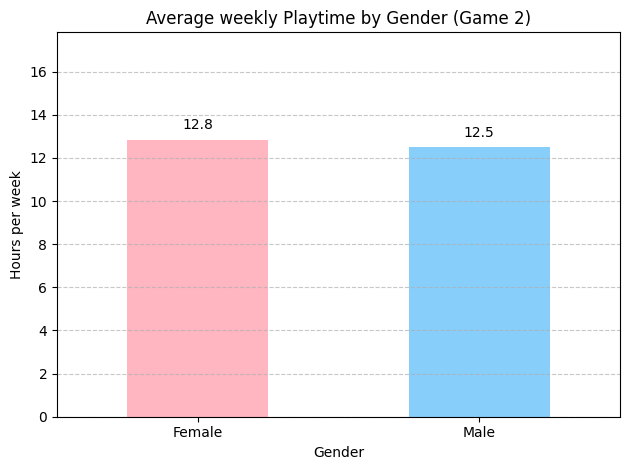

In [338]:
# Game 1
media_por_genero.plot(kind='bar', color=['#ffb6c1', '#87cefa'])  # Colores: rosa y azul claro

plt.title("Average weekly Playtime by Gender (Game 1)")
plt.ylabel("Hours per week")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylim(0, max(media_por_genero) + 5)  # Límite superior dinámico
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valor numérico encima de cada barra
for i, valor in enumerate(media_por_genero):
    plt.text(i, valor + 0.5, f'{valor:.1f}', ha='center')

plt.tight_layout()
plt.show()

# Game 2
media_por_genero_2.plot(kind='bar', color=['#ffb6c1', '#87cefa'])  # Colores: rosa y azul claro

plt.title("Average weekly Playtime by Gender (Game 2)")
plt.ylabel("Hours per week")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylim(0, max(media_por_genero_2) + 5)  # Límite superior dinámico
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valor numérico encima de cada barra
for i, valor in enumerate(media_por_genero_2):
    plt.text(i, valor + 0.5, f'{valor:.1f}', ha='center')

plt.tight_layout()
plt.show()


## 🧠 Conclusión: Perfil del jugador que más horas dedica a jugar (Game 1 y Game 2)

Para identificar al jugador más activo, se ha utilizado la variable de horas jugadas por semana tanto para **Game 1** (`hours_per_week_1`) como para **Game 2** (`hours_per_week_2`). Se consideran “jugadores activos” aquellos que afirman jugar **más de 10 horas semanales** (categorías `"10–20 hours"` y `"More than 20 hours"`).

### 👤 Perfil sociodemográfico
- **Edad predominante:** entre **16 y 35 años** en ambos juegos, siendo los grupos **16–20** y **21–25** los que concentran la mayor proporción de jugadores con más horas.
- **Género:** aunque el reparto total de género es equilibrado, los **jugadores más activos** tienden a ser **mujeres**, especialmente en Game 1. En Game 2, el género tiene un peso más repartido, aunque sigue habiendo ligera predominancia femenina entre los más activos.

### 📱 Dispositivo principal
- En **Game 1**, el **móvil** es el dispositivo más utilizado entre los jugadores que más horas dedican, sobre todo en los más jóvenes.
- En **Game 2**, se observa mayor equilibrio entre **PC, móvil y consola**, aunque el **PC y la consola** destacan ligeramente entre quienes juegan más de 10 horas.

### 🎮 Juegos favoritos entre los más activos
- **Game 1:** _Call of Duty_, _God of War: Ragnarok_, _Wuthering Waves_, _BGMI_, _Fortnite_ y _Free Fire_ destacan entre los más activos.
- **Game 2:** _Apex Legends_, _Call of Duty_, _FIFA 2024_, _League of Legends_ y _Overwatch_ son los favoritos entre quienes juegan más horas.

### 🎯 Motivaciones principales
- **Game 1:** Los jugadores más activos están motivados por la **diversión**, el **alivio del estrés** y la **competencia**. También aparece en menor medida la **socialización**.
- **Game 2:** Entre los más activos destacan la **socialización**, la **historia del juego** y el **alivio del estrés**, seguido de la **competencia**.

### 🧠 Modo de juego preferido
- **Game 1:** La mayoría de los jugadores activos prefieren **ambos modos de juego** (single y multiplayer), aunque el **modo multijugador** también tiene peso.
- **Game 2:** La distribución es más homogénea entre los jugadores más activos, pero el **modo multijugador** tiene una ligera ventaja frente a single-player y both.

### 🎮 Géneros más populares
- **Game 1:** Géneros predominantes entre los jugadores más activos son **Action-Adventure**, **First-Person Shooter**, **Role-Playing** y **MMO**.
- **Game 2:** Aunque hay más diversidad, destacan **Action-Adventure**, **Puzzle-Strategy**, **First-Person Shooter** y **Role-Playing**.

---

### ✅ Perfil del jugador más activo en ambos juegos

- **Edad:** entre **16 y 25 años**.
- **Género:** principalmente **femenino**.
- **Horas de juego:** **más de 10 horas semanales** en uno o ambos juegos.
- **Dispositivo favorito:**
  - Game 1: **Móvil**.
  - Game 2: **PC o consola**.
- **Motivaciones clave:** 
  - Game 1: **Diversión**, **estrés** y **competencia**.
  - Game 2: **Socialización**, **historia** y **estrés**.
- **Juego favorito:** _Call of Duty_ es transversal en ambos juegos para los más activos.
- **Modo de juego:** suelen preferir **ambos modos**, con ligera inclinación al **multijugador**.
- **Géneros favoritos:** **Action-Adventure**, **FPS**, y **Role-Playing**.

> Este perfil combina los comportamientos más frecuentes observados en ambos juegos, considerando variables cruzadas de edad, dispositivo, motivación y frecuencia de juego.

## 4. 🧩 Plan de acción

A partir de los insights obtenidos, proponemos las siguientes acciones:

- **Segmentación de usuarios**: Crear perfiles de jugadores en base a variables clave como edad, género, dispositivo y motivaciones, para personalizar las recomendaciones o campañas de marketing.
- **Optimización del diseño de juegos**: Fomentar los modos de juego más populares entre los perfiles más activos, mejorando así la experiencia de usuario.
- **Campañas dirigidas**: Diseñar campañas promocionales orientadas a los grupos con mayor número de horas de juego semanales, aumentando así la eficacia del marketing.
- **Mejoras en la retención**: Adaptar contenidos, recompensas o interfaces para los perfiles menos activos, con el objetivo de incrementar su tiempo de juego y fidelización.

## 5. 🌐 Productivización

Aunque este análisis tiene un enfoque exploratorio, sería viable implementar un dashboard interactivo para su uso por parte de otros equipos (marketing, diseño de producto, etc.). Esto permitiría:

- Filtrar datos por género, edad, dispositivo o motivaciones.
- Visualizar variaciones en las horas jugadas según perfiles.
- Detectar en tiempo real a los jugadores más activos.

Este dashboard podría implementarse con herramientas como **Tableau, Power BI o Streamlit**, y conectarse a una base de datos para actualizarse automáticamente.

